# **Mini Project 3 : Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning)**

# **Data Preparation**

## **Data Description**

##**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from datetime import datetime

from scipy.stats import skew
from scipy.stats import kurtosis

#Ignores warning
import warnings
warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style('whitegrid')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if round(x,0) == x else '{:.3f}'.format(x)

import matplotlib as mp
%matplotlib inline
import textwrap
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

##**Import Datasets**

In [3]:
#Import Dataset
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/PORTOFOLIO/Mini Project 3/marketing_campaign_data.csv'

# Baca data CSV menggunakan pandas
df = pd.read_csv(file_path)

#df = pd.read_csv(source)
df.head()

Mounted at /content/drive


,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
cat_cols = ['ID', 'Education', 'Marital_Status',  'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
            'AcceptedCmp2', 'Complain', 'Response']

num_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
            'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']

timestamp = ['Dt_Customer']

##**Handling Missing Value**

In [5]:
# Mencetak apakah ada nilai yang hilang di DataFrame
print('Missing value status:', df.isnull().values.any())

# Menghitung total nilai null per kolom, mengurutkan berdasarkan jumlah null
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values'] / df.shape[0]) * 100
nvc['Data Type'] = [df[col].dtype for col in nvc.index]

# Mengurutkan berdasarkan Total Null Values dan Percentage secara menurun
nvc.sort_values(by=['Total Null Values', 'Percentage'], ascending=False, inplace=True)

# Mencetak hasil
print(nvc)

Missing value status: True
                     Total Null Values  Percentage Data Type
Income                              24       1.071   float64
Unnamed: 0                           0           0     int64
Z_CostContact                        0           0     int64
Complain                             0           0     int64
AcceptedCmp2                         0           0     int64
AcceptedCmp1                         0           0     int64
AcceptedCmp5                         0           0     int64
AcceptedCmp4                         0           0     int64
AcceptedCmp3                         0           0     int64
NumWebVisitsMonth                    0           0     int64
NumStorePurchases                    0           0     int64
NumCatalogPurchases                  0           0     int64
NumWebPurchases                      0           0     int64
NumDealsPurchases                    0           0     int64
MntGoldProds                         0           0     int

Berdasarkan hasil analisa awal, dapat diketahui bahwa terdapat data kosong pada kolom income sebanyak 24 baris dengan persentase sebesar 1,0796 dari keseluruhan
data.

Pada proses handling missing values untuk kolom Income ada beberapa metode yang dapat di lakukan :

- Drop Rows Missing Values
- Imputation Median
  - Fillna or SimpleImputer
- Multivariate Approach
  - Perlu dipastikan untuk data yang dimiliki semuanya dalam bentuk tipe numerical (tidak ada bertipe obeject/string maupun datetime)
  - Kita juga drop kolom yang tidak penting seperti data tanggal Dt Customer
  - Metode:
    - KNNImputer or K-Nearest Neighbor
    - MICE or Multiple Imputation by Chained Eguation
      - Imputation using MICE with IterativerImputer
      - Imputation using MICE with LightGBM

Choice Determination:
- Pada proses handling missing values kita menggunakan Imputation using MICE with LightGBM


###Drop Rows (limited data so we didn't use this)

### Imputation

In [6]:
#Imputation using fillna

df['Income'].fillna(df['Income'].median(), inplace=True)
df.isna().sum()

Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [7]:
#Imputation using SimpleImputer

from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df['Income'] = imputer.fit_transform(df[['Income']])
df['Income'].isna().sum(  )

0

In [8]:
#Imputation using Multivariate Approach

df_ma = df.copy()

In [9]:
drop = ['ID', 'Education', 'Marital_Status', 'Dt_Customer']
df_ma = df_ma.drop(drop, axis=1)

In [10]:
df_ma.head()

,Unnamed: 0,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,1957,58138000,0,0,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,1954,46344000,1,1,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,1965,71613000,0,0,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,1984,26646000,1,0,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,1981,58293000,1,0,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
#Imputation using MICE with LightGBM

print('Jumlah missing values Income sebelum Imputation =', df['Income'].isna().sum())

Jumlah missing values Income sebelum Imputation = 24


In [11]:
pip install miceforest --no-cache-dir


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 241.8 MB/s eta 0:00:00


In [12]:
object_cols = df_ma.select_dtypes(include=['object']).columns
df_ma[object_cols] = df_ma[object_cols].astype('category')

In [13]:
import miceforest as mf

kds = mf.ImputationKernel(
    df_ma,
    save_all_iterations=True,
    random_state=100
)

kds.mice(iterations=5, n_estimators=50)

df_imputed = kds.complete_data()
df['Income'] = df_imputed['Income'].copy()
df.head( )

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
print('Jumlah missing values Income setelah Imputation =', df['Income'].isna().sum())

Jumlah missing values Income setelah Imputation = 0


##Handling Duplicate Rows

In [14]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns.values))

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [15]:
df.duplicated().sum()

0

In [16]:
print(f'Data Frame Dimension Before Duplicate Removal: {df.shape}')
df = df.drop_duplicates().reset_index(drop=True)
print(f'Data Frame Dimension After Duplicate Removal: {df.shape}')

Data Frame Dimension Before Duplicate Removal: (2240, 30)
Data Frame Dimension After Duplicate Removal: (2240, 30)


In [17]:
df.duplicated(subset=['ID']).sum()

0

- Tidak ditemui baris data yang memiliki duplikat
- Tidak ditemukan adanya ID Customer yang sama

##Handling Invalid Values

In [18]:
#Check for the unique values in the data.

for x in df.columns :
    unq = list(df[x].unique())
    sorted(unq)

    print (f'===== {x} =====')
    if len(unq) >= 10:
        unq = list(unq[:10])+['.....']
        print (f'{unq}')
    else:
        print (f'{unq}')
    print()

===== Unnamed: 0 =====
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, '.....']

===== ID =====
[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, '.....']

===== Year_Birth =====
[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, '.....']

===== Education =====
['S1', 'S3', 'S2', 'SMA', 'D3']

===== Marital_Status =====
['Lajang', 'Bertunangan', 'Menikah', 'Cerai', 'Janda', 'Duda']

===== Income =====
[58138000.0, 46344000.0, 71613000.0, 26646000.0, 58293000.0, 62513000.0, 55635000.0, 33454000.0, 30351000.0, 5648000.0, '.....']

===== Kidhome =====
[0, 1, 2]

===== Teenhome =====
[0, 1, 2]

===== Dt_Customer =====
['04-09-2012', '08-03-2014', '21-08-2013', '10-02-2014', '19-01-2014', '09-09-2013', '13-11-2012', '08-05-2013', '06-06-2013', '13-03-2014', '.....']

===== Recency =====
[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, '.....']

===== MntCoke =====
[635000, 11000, 426000, 173000, 520000, 235000, 76000, 14000, 28000, 5000, '.....']

===== MntFruits =====
[88000, 1000, 49000, 4000,

In [19]:
# Konversi data `Date`

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [20]:
#Drop Column 1
df.drop(df.columns[0], axis=1, inplace=True)

In [21]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


kolom `Dt_Customer` sebelumnya masih berbentuk string/object sehingga diubah menjadi Datetime untuk diolah pada tahap Feature Engineering dan menghapus column1 karena tidak kita gunakan datanya

##**Handling Outliers**

In [22]:
print(f'Jumlah baris: {len(df)}')

outlier = []
no_outlier = []
is_outlier = []
low_lim = []
high_lim = []

filtered_entries = np.array([True] * len(df))
for col in num_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  low_limit = Q1 - (IQR * 1.5)
  high_limit =  Q3 + (IQR * 1.5)

  filter_outlier = ((df[col] >= low_limit) & (df[col] <= high_limit))
  outlier.append(len(df[~filter_outlier]))
  no_outlier.append(len(df[filter_outlier]))
  is_outlier.append(df[col][~filter_outlier].any())
  low_lim.append(low_limit)
  high_lim.append(high_limit)

  filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

print('Outlier All Data:', len(df[~filtered_entries]))
print('Not Outlier All Data:', len(df[filtered_entries]))
print()

pd.DataFrame({
    'Column Name':num_cols,
    'is Outlier':is_outlier,
    'Lower Limit': low_lim,
    'Upper Limit': high_lim,
    'Outlier': outlier,
    'No Outlier': no_outlier
})

Jumlah baris: 2240
Outlier All Data: 706
Not Outlier All Data: 1534



,Column Name,is Outlier,Lower Limit,Upper Limit,Outlier,No Outlier
0,Year_Birth,True,1932,2004,3,2237
1,Income,True,-13587750,117416250,8,2232
2,Kidhome,False,-1.500,2.500,0,2240
3,Teenhome,False,-1.500,2.500,0,2240
4,Recency,False,-51,149,0,2240
5,MntCoke,True,-697000,1225000,35,2205
6,MntFruits,True,-47000,81000,227,2013
7,MntMeatProducts,True,-308000,556000,175,2065
8,MntFishProducts,True,-67500,120500,223,2017
9,MntSweetProducts,True,-47000,81000,248,1992


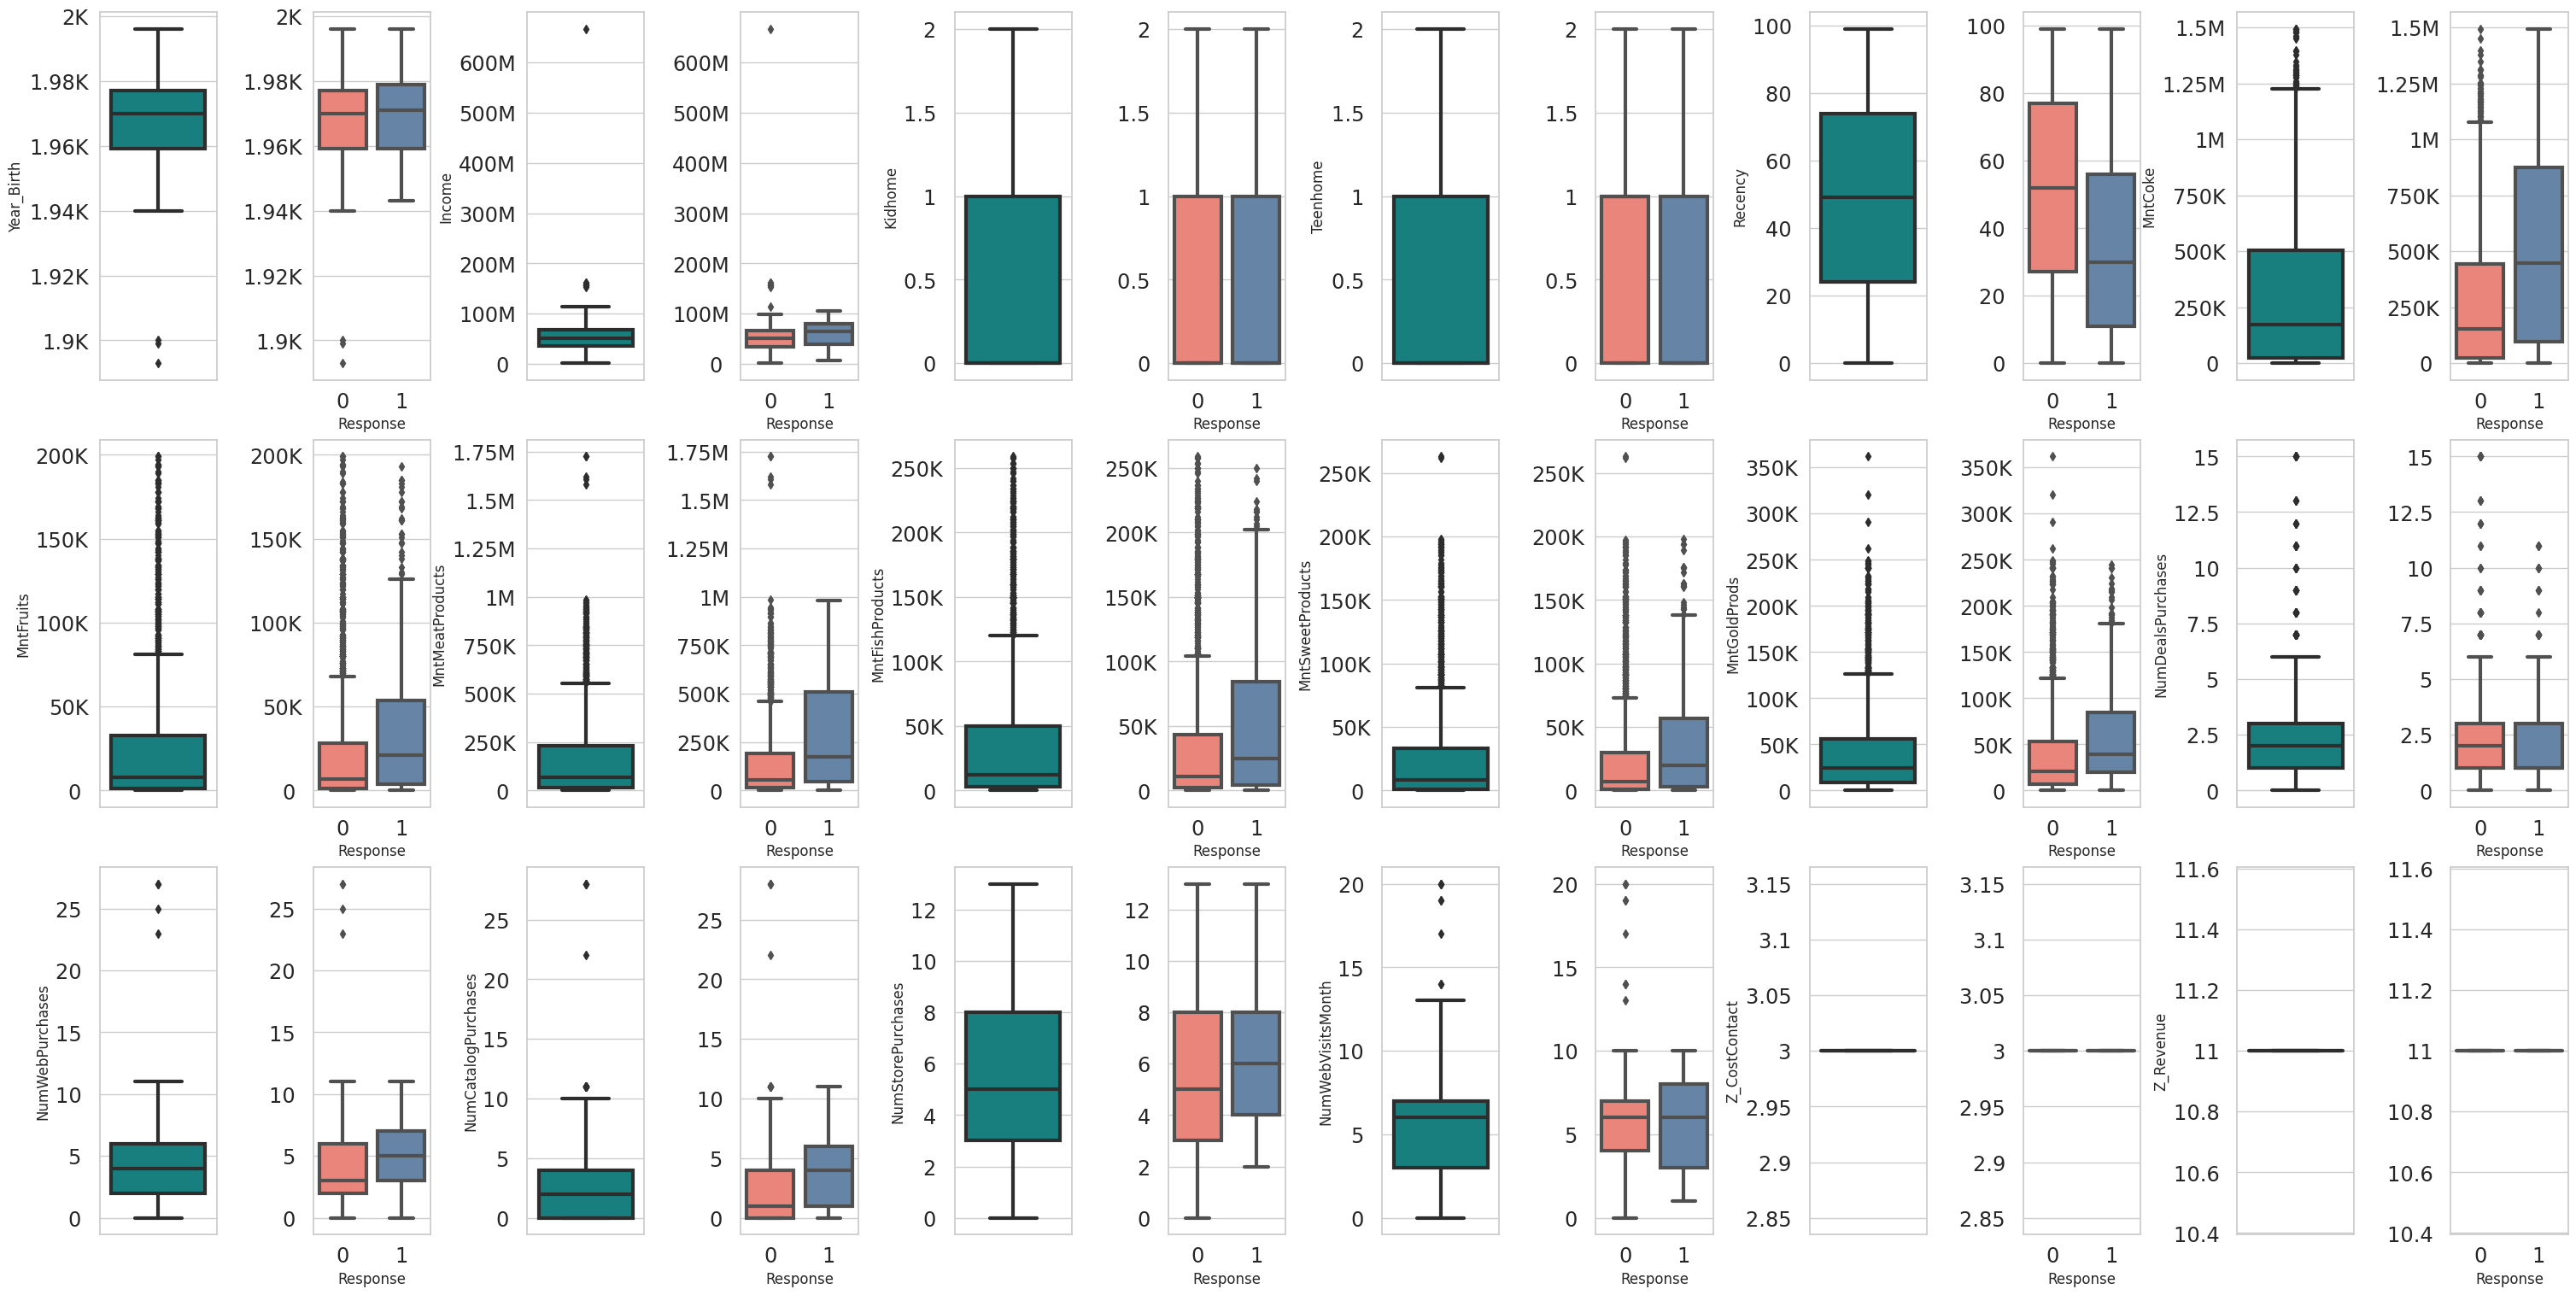

In [23]:
from math import log10, floor
def format_func(value, tick_number=None):
  num_thousands = 0 if abs(value) < 1000 else floor (log10(abs(value))/3)
  value = round(value / 1000**num_thousands, 2)
  return f'{value:g}'+' KMGTPEZY'[num_thousands]

plt.figure(figsize=(30, 15))
n = 3
j = 0

colors=['#FC766AFF', '#5B84B1FF']

for i in range(0, len(num_cols)*2, 2):
  ax1 = plt.subplot(n, math.ceil(len(num_cols)*2/n), i+1)
  sns.boxplot(y=df[num_cols[j]], color='#088F8F', orient='v')

  ax2 = plt.subplot(n, math.ceil(len(num_cols)*2/n), i+2, sharey=ax1)
  sns.boxplot(x=df['Response'], y=df[num_cols[j]], palette=colors, orient='v')

  ax2.yaxis.set_major_formatter(plt.FuncFormatter(format_func))

  ax2.set_ylabel(None)

  plt.tight_layout(pad=0.1)

  j+=1

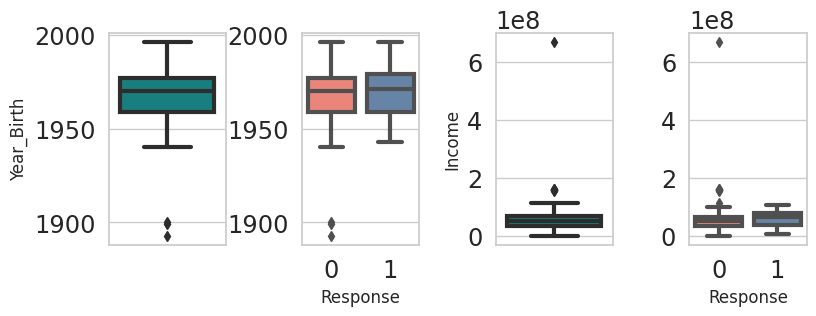

In [24]:
cols = ['Year_Birth','Income']

plt.figure(figsize=(8, 3))
n = 1
j = 0

colors=['#FC766AFF', '#5B84B1FF']

for i in range(0, len(cols)*2, 2):
  ax1 = plt.subplot(n, math.ceil(len(cols)*2/n), i+1)
  sns.boxplot(y=df[cols[j]], color='#088F8F', orient='v')

  ax2 = plt.subplot(n, math.ceil(len(cols)*2/n), i+2, sharey=ax1)
  sns.boxplot(x=df['Response'], y=df[cols[j]], palette=colors, orient='v')

  ax2.set_ylabel(None)

  plt.tight_layout(pad=0.1)

  j+=1

#Feature Engineering

In [25]:
# Age

currentyear = 2014 #based on data
df['Age'] = currentyear - df['Year_Birth']

# Age Group

def age_group(x):
  if x > 45:
    grup = 'Senior Adult'
  elif x > 30:
    grup = 'Adult'
  elif x > 16:
    grup = 'Young Adult'
  elif x > 11:
    grup = 'Teens'
  else:
    grup = 'Child'

  return grup

df['Age_group'] = df['Age'].apply(lambda x: age_group(x))
df['Age_group'].unique()

array(['Senior Adult', 'Young Adult', 'Adult'], dtype=object)

In [26]:
# Number_Of_Children
# Combining Kidhome and Teenhome

df['Number_Of_Children'] = df['Kidhome'] + df['Teenhome']

In [27]:
# Lifetime
df['Lifetime'] = (2014 - df['Dt_Customer'].dt.year)*12 + df['Dt_Customer'].dt.month

In [28]:
# Total_Spending
df['Total_Spending'] = df['MntCoke']+ \
    df['MntFruits']+ \
    df['MntMeatProducts']+ \
    df['MntFishProducts']+ \
    df['MntSweetProducts']+ \
    df['MntGoldProds']

In [29]:
# Primer and Tersier Product
df['Primer_purchase'] = df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']
df['Tersier_purchase'] = df['MntCoke']+df['MntSweetProducts']+df['MntGoldProds']

In [30]:
# Total of Purchases

df['Total_Purchases'] = df['NumCatalogPurchases']+ \
                        df['NumWebPurchases']+ \
                        df['NumDealsPurchases']+ \
                        df['NumStorePurchases']

In [31]:
# Total Campaign Accepted
df['Total_Campaign_Acc'] = df['AcceptedCmp1'].astype('int64')+ \
                  df['AcceptedCmp2'].astype('int64')+ \
                  df['AcceptedCmp3'].astype('int64')+ \
                  df['AcceptedCmp4'].astype('int64')+ \
                  df['AcceptedCmp5'].astype('int64')

In [32]:
#Education_Level
def education_level(education):
    if education in ['S1', 'S2', 'S3']:
        return 'High'
    elif education in ['D3']:
        return 'Middle'
    else:
        return 'Low'

df['Education_Level'] = df['Education'].apply(education_level)

In [33]:
# Ever_Accept
df['Ever_Accept'] = df['Total_Campaign_Acc'].apply(lambda x : 1 if x >= 1 else 0)

In [34]:
# Total Revenue
df['Total_Revenue'] = (df['Total_Campaign_Acc']) * df['Z_Revenue']
df[['Z_Revenue', 'Total_Revenue']].sample(5)

,Z_Revenue,Total_Revenue
497,11,0
552,11,0
1869,11,33
1431,11,0
1489,11,0


In [35]:
# Income Group

Q1 = df['Income'].quantile(.25)
print(Q1)
Q3 = df['Income'].quantile(.75)
print(Q3)

def income_group(x):
    if(x is None) or (type(x) not in [int, float]) :
      segment = 'None'
    else:
      if x >= Q3:
        segment = 'High'
      elif x < Q3 and x >= Q1:
        segment = 'Medium'
      else:
        segment = 'Low'
    return segment

df['Income_Group'] = df['Income'].fillna('None')
df['Income_Group'] = df['Income_Group'].apply(lambda x: income_group(x))

35538750.0
68289750.0


In [36]:
df['Income_Group'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [37]:
# Conversion Rate Web
# Calculated as the ratio of total purchase t0 the number of web visits. it represents the percentage of website visitors who made purchases

df['Convertion_rate_web'] = np.round(df['Total_Purchases'] / df['NumWebVisitsMonth'], 2)
df['Convertion_rate_web'].fillna(0, inplace=True)
df['Convertion_rate_web'].replace([np.inf, -np.inf], 0, inplace=True)

In [38]:
# Month and Year Joined
# Konversi kolom 'Dt_Customer' ke tipe data datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Buat kolom 'Year_joined' dan 'Month_joined' berdasarkan tanggal bergabung
df['Year_joined'] = df['Dt_Customer'].dt.year
df['Month_joined'] = df['Dt_Customer'].dt.month

In [39]:
#Create another feature "Living_Status" out of "Marital_Status" to extract the living situation of couples
df['Living_Status'] = df['Marital_Status'].replace({'Lajang' : 'Living Alone',
                                                    'Cerai' : 'Living Alone', 'Janda' : 'Living Alone',
                                                    'Duda' : 'Living Alone', 'Menikah' : 'Living with Partner',
                                                    'Bertunangan' :'Living with Partner'})

In [40]:
df['Living_Status'].unique()

array(['Living Alone', 'Living with Partner'], dtype=object)

In [41]:
#Recency_sgmt
#used to group cust. based on the time since their last purchase in the supermarket

num_score = 5
cek = pd.qcut(df['Recency'].unique(), num_score, labels=range(num_score, 0, -1))
cek = pd.DataFrame({
    'value': df['Recency'].unique(),
    'score': cek
})

In [42]:
# Merge DataFrame cek dengan DataFrame df berdasarkan kolom 'Recency'
df = df.merge(cek, left_on='Recency', right_on='value', how='left')

# Buat kolom 'Recency_sgmt' dengan menggunakan kolom 'score' dari DataFrame cek
df['Recency_sgmt'] = df['score']

# Hapus kolom 'value' dan 'score' yang tidak diperlukan lagi
df.drop(columns=['value', 'score'], inplace=True)

In [43]:
df[['Year_Birth', 'Income']].describe()

,Year_Birth,Income
count,2240,2240
mean,1968.806,52237975.446
std,11.984,25037955.891
min,1893,1730000
25%,1959,35538750
50%,1970,51381500
75%,1977,68289750
max,1996,666666000


**Manually Trimmed**
- Kolom `Year_Birth`, menghapus nilai yang sangat jauh di tahun `1893-1900`
- Kolom `Income` menghapus nilai yang sangat tinggi sebesar `666M`

In [44]:
print('Jumlah data sebelum handling outliers :', df.shape[0])

df = df[~(df['Year_Birth'] <= 1900)]
print('Jumlah data setelah handling outliers (Year_Birth) : {}'.format(df.shape[0]))

df = df[~(df['Income'] >= 666666000)]  # Mengubah <= menjadi >=
print('Jumlah data setelah handling outliers (Income) : {}'.format(df.shape[0]))

Jumlah data sebelum handling outliers : 2240
Jumlah data setelah handling outliers (Year_Birth) : 2237
Jumlah data setelah handling outliers (Income) : 2236


In [45]:
df[['Year_Birth', 'Income']].describe()

,Year_Birth,Income
count,2236,2236
mean,1968.898,51952614.043
std,11.703,21411466.851
min,1940,1730000
25%,1959,35502500
50%,1970,51381500
75%,1977,68275750
max,1996,162397000


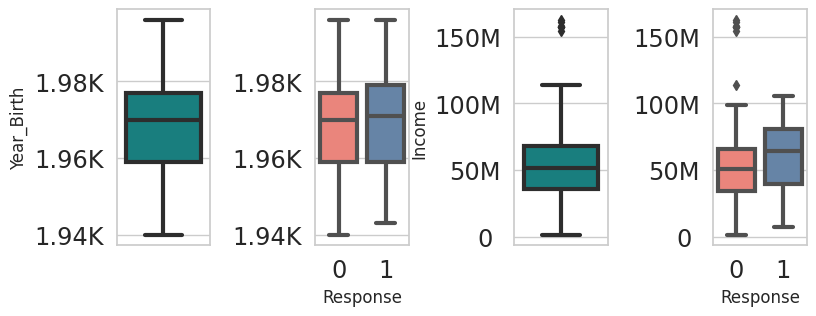

In [46]:
#Mengecek hasil Trimmed / Drop Outliers

plt.figure(figsize=(8, 3))
n = 1
j = 0

colors=['#FC766AFF', '#5B84B1FF']

for i in range(0, len(cols)*2, 2):
  ax1 = plt.subplot(n, math.ceil(len(cols)*2/n), i+1)
  sns.boxplot(y=df[cols[j]], color='#088F8F', orient='v')

  ax2 = plt.subplot(n, math.ceil(len(cols)*2/n), i+2, sharey=ax1)
  sns.boxplot(x=df['Response'], y=df[cols[j]], palette=colors, orient='v')

  ax2.yaxis.set_major_formatter(plt.FuncFormatter(format_func))

  ax2.set_ylabel(None)

  plt.tight_layout(pad=0.1)

  j+=1

In [47]:
df.reset_index(drop=True, inplace=True)

##**Feature Transformation (Numeric)**
Mengecek Skewness di tiap kolom untuk menentukan jenis Transformation

In [48]:
skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in num_cols:
    data = df[column].dropna(axis=0)
    q1 = data.quantile(q=0.25)
    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]
    q3 = data.quantile(q=0.75)

    skew_val = round(skew(data, nan_policy="omit"),3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)

    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = 'Negatively Skewed'
        if skew_val <= -1:
            skew_type = 'Highly Negatively Skewed'
        elif -0.5 >= skew_val > -1:
            skew_type = 'Moderately Negatively Skewed'
        else :
            skew_type = 'Moderately Normal Distribution (Symmetric)'

    else:
        skew_type = 'Positively Skewed'
        if skew_val >= 1:
            skew_type = 'Highly Positively Skewed'
        elif 0.5 <= skew_val < 1:
            skew_type = 'Moderately Positively Skewed'
        else :
            skew_type = 'Moderately Normal Distribution (Symmetric)'
    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)

dist = pd.DataFrame({
    'Column Name':num_cols,
    'Skewness': skew_val_list,
    'Kurtosis': kurtosis_val_list,
    'Type of Distribution': skew_type_list
})

dist.loc[dist["Column Name"].isin(["Z_CostContact", "Z_Revenue"]), "Type of Distribution"] = "Uniform Distribution"
dist.loc[dist["Column Name"].isin(["Kidhome", "Teenhome"]), "Type of Distribution"] = "Bimodal Distribution"
dist = dist.sort_values(['Type of Distribution', 'Column Name']).reset_index(drop=True)
dist

,Column Name,Skewness,Kurtosis,Type of Distribution
0,Kidhome,0.636,-0.779,Bimodal Distribution
1,Teenhome,0.406,-0.987,Bimodal Distribution
2,MntCoke,1.175,0.597,Highly Positively Skewed
3,MntFishProducts,1.919,3.086,Highly Positively Skewed
4,MntFruits,2.103,4.058,Highly Positively Skewed
5,MntGoldProds,1.884,3.548,Highly Positively Skewed
6,MntMeatProducts,2.084,5.515,Highly Positively Skewed
7,MntSweetProducts,2.134,4.360,Highly Positively Skewed
8,NumCatalogPurchases,1.880,8.030,Highly Positively Skewed
9,NumDealsPurchases,2.417,8.910,Highly Positively Skewed


In [49]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Daftar kolom numerik yang sudah ada
num_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
            'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
            'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
            'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']

# Kolom yang akan ditambahkan
additional_cols = ['Age', 'Total_Purchases', 'Convertion_rate_web','Primer_purchase',
                   'Total_Campaign_Acc', 'Total_Revenue', 'Total_Spending', 'Tersier_purchase',
                   'Lifetime', 'Month_joined', 'Year_joined']

# Menambahkan kolom-kolom baru ke dalam daftar num_cols
num_cols.extend(additional_cols)

skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in num_cols:
    data = df[column].dropna(axis=0)
    q1 = data.quantile(q=0.25)
    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]
    q3 = data.quantile(q=0.75)

    skew_val = round(skew(data, nan_policy="omit"), 3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"), 3)

    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = 'Negatively Skewed'
        if skew_val <= -1:
            skew_type = 'Highly Negatively Skewed'
        elif -0.5 >= skew_val > -1:
            skew_type = 'Moderately Negatively Skewed'
        else :
            skew_type = 'Moderately Normal Distribution (Symmetric)'
    else:
        skew_type = 'Positively Skewed'
        if skew_val >= 1:
            skew_type = 'Highly Positively Skewed'
        elif 0.5 <= skew_val < 1:
            skew_type = 'Moderately Positively Skewed'
        else :
            skew_type = 'Moderately Normal Distribution (Symmetric)'
    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)

dist = pd.DataFrame({
    'Column Name': num_cols,
    'Skewness': skew_val_list,
    'Kurtosis': kurtosis_val_list,
    'Type of Distribution': skew_type_list
})

dist.loc[dist["Column Name"].isin(["Z_CostContact", "Z_Revenue"]), "Type of Distribution"] = "Uniform Distribution"
dist.loc[dist["Column Name"].isin(["Kidhome", "Teenhome"]), "Type of Distribution"] = "Bimodal Distribution"
dist = dist.sort_values(['Type of Distribution', 'Column Name']).reset_index(drop=True)
dist

,Column Name,Skewness,Kurtosis,Type of Distribution
0,Kidhome,0.636,-0.779,Bimodal Distribution
1,Teenhome,0.406,-0.987,Bimodal Distribution
2,Convertion_rate_web,2.332,6.442,Highly Positively Skewed
3,MntCoke,1.175,0.597,Highly Positively Skewed
4,MntFishProducts,1.919,3.086,Highly Positively Skewed
5,MntFruits,2.103,4.058,Highly Positively Skewed
6,MntGoldProds,1.884,3.548,Highly Positively Skewed
7,MntMeatProducts,2.084,5.515,Highly Positively Skewed
8,MntSweetProducts,2.134,4.360,Highly Positively Skewed
9,NumCatalogPurchases,1.880,8.030,Highly Positively Skewed


In [50]:
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Age_group', 'Number_Of_Children', 'Lifetime', 'Total_Spending',
       'Primer_purchase', 'Tersier_purchase', 'Total_Purchases',
       'Total_Campaign_Acc', 'Education_Level', 'Ever_Accept', 'Total_Revenue',
       'Income_Group', 'Convertion_rate_web', 'Year_joined', 'Month_joined',
       'Living_Status', 'Recency_sgmt'],
      dtype='object')


In [51]:
num_cols

['Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntCoke',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Z_CostContact',
 'Z_Revenue',
 'Age',
 'Total_Purchases',
 'Convertion_rate_web',
 'Primer_purchase',
 'Total_Campaign_Acc',
 'Total_Revenue',
 'Total_Spending',
 'Tersier_purchase',
 'Lifetime',
 'Month_joined',
 'Year_joined']

In [52]:
exclude = ['Kidhome', 'Teenhome', 'Total_Campaign_Acc']

log_cols = sorted(list(dist[
    dist['Type of Distribution'].str.contains('Positively Skewed') &
    ~dist['Column Name'].isin(exclude)
]['Column Name'].values))

norm_cols = sorted(list(dist[
    dist['Type of Distribution'].str.contains('Normal Distribution') &
    ~dist['Column Name'].isin(exclude)
]['Column Name'].values))

print('Log Transformation =', log_cols)
print('Normalisasi/Standardization =', norm_cols)

Log Transformation = ['Convertion_rate_web', 'MntCoke', 'MntFishProducts', 'MntFruits', 'MntGoldProds', 'MntMeatProducts', 'MntSweetProducts', 'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases', 'NumWebPurchases', 'Primer_purchase', 'Tersier_purchase', 'Total_Revenue', 'Total_Spending']
Normalisasi/Standardization = ['Age', 'Income', 'Lifetime', 'Month_joined', 'NumWebVisitsMonth', 'Recency', 'Total_Purchases', 'Year_Birth', 'Year_joined']


Yeo Johnson Transformation

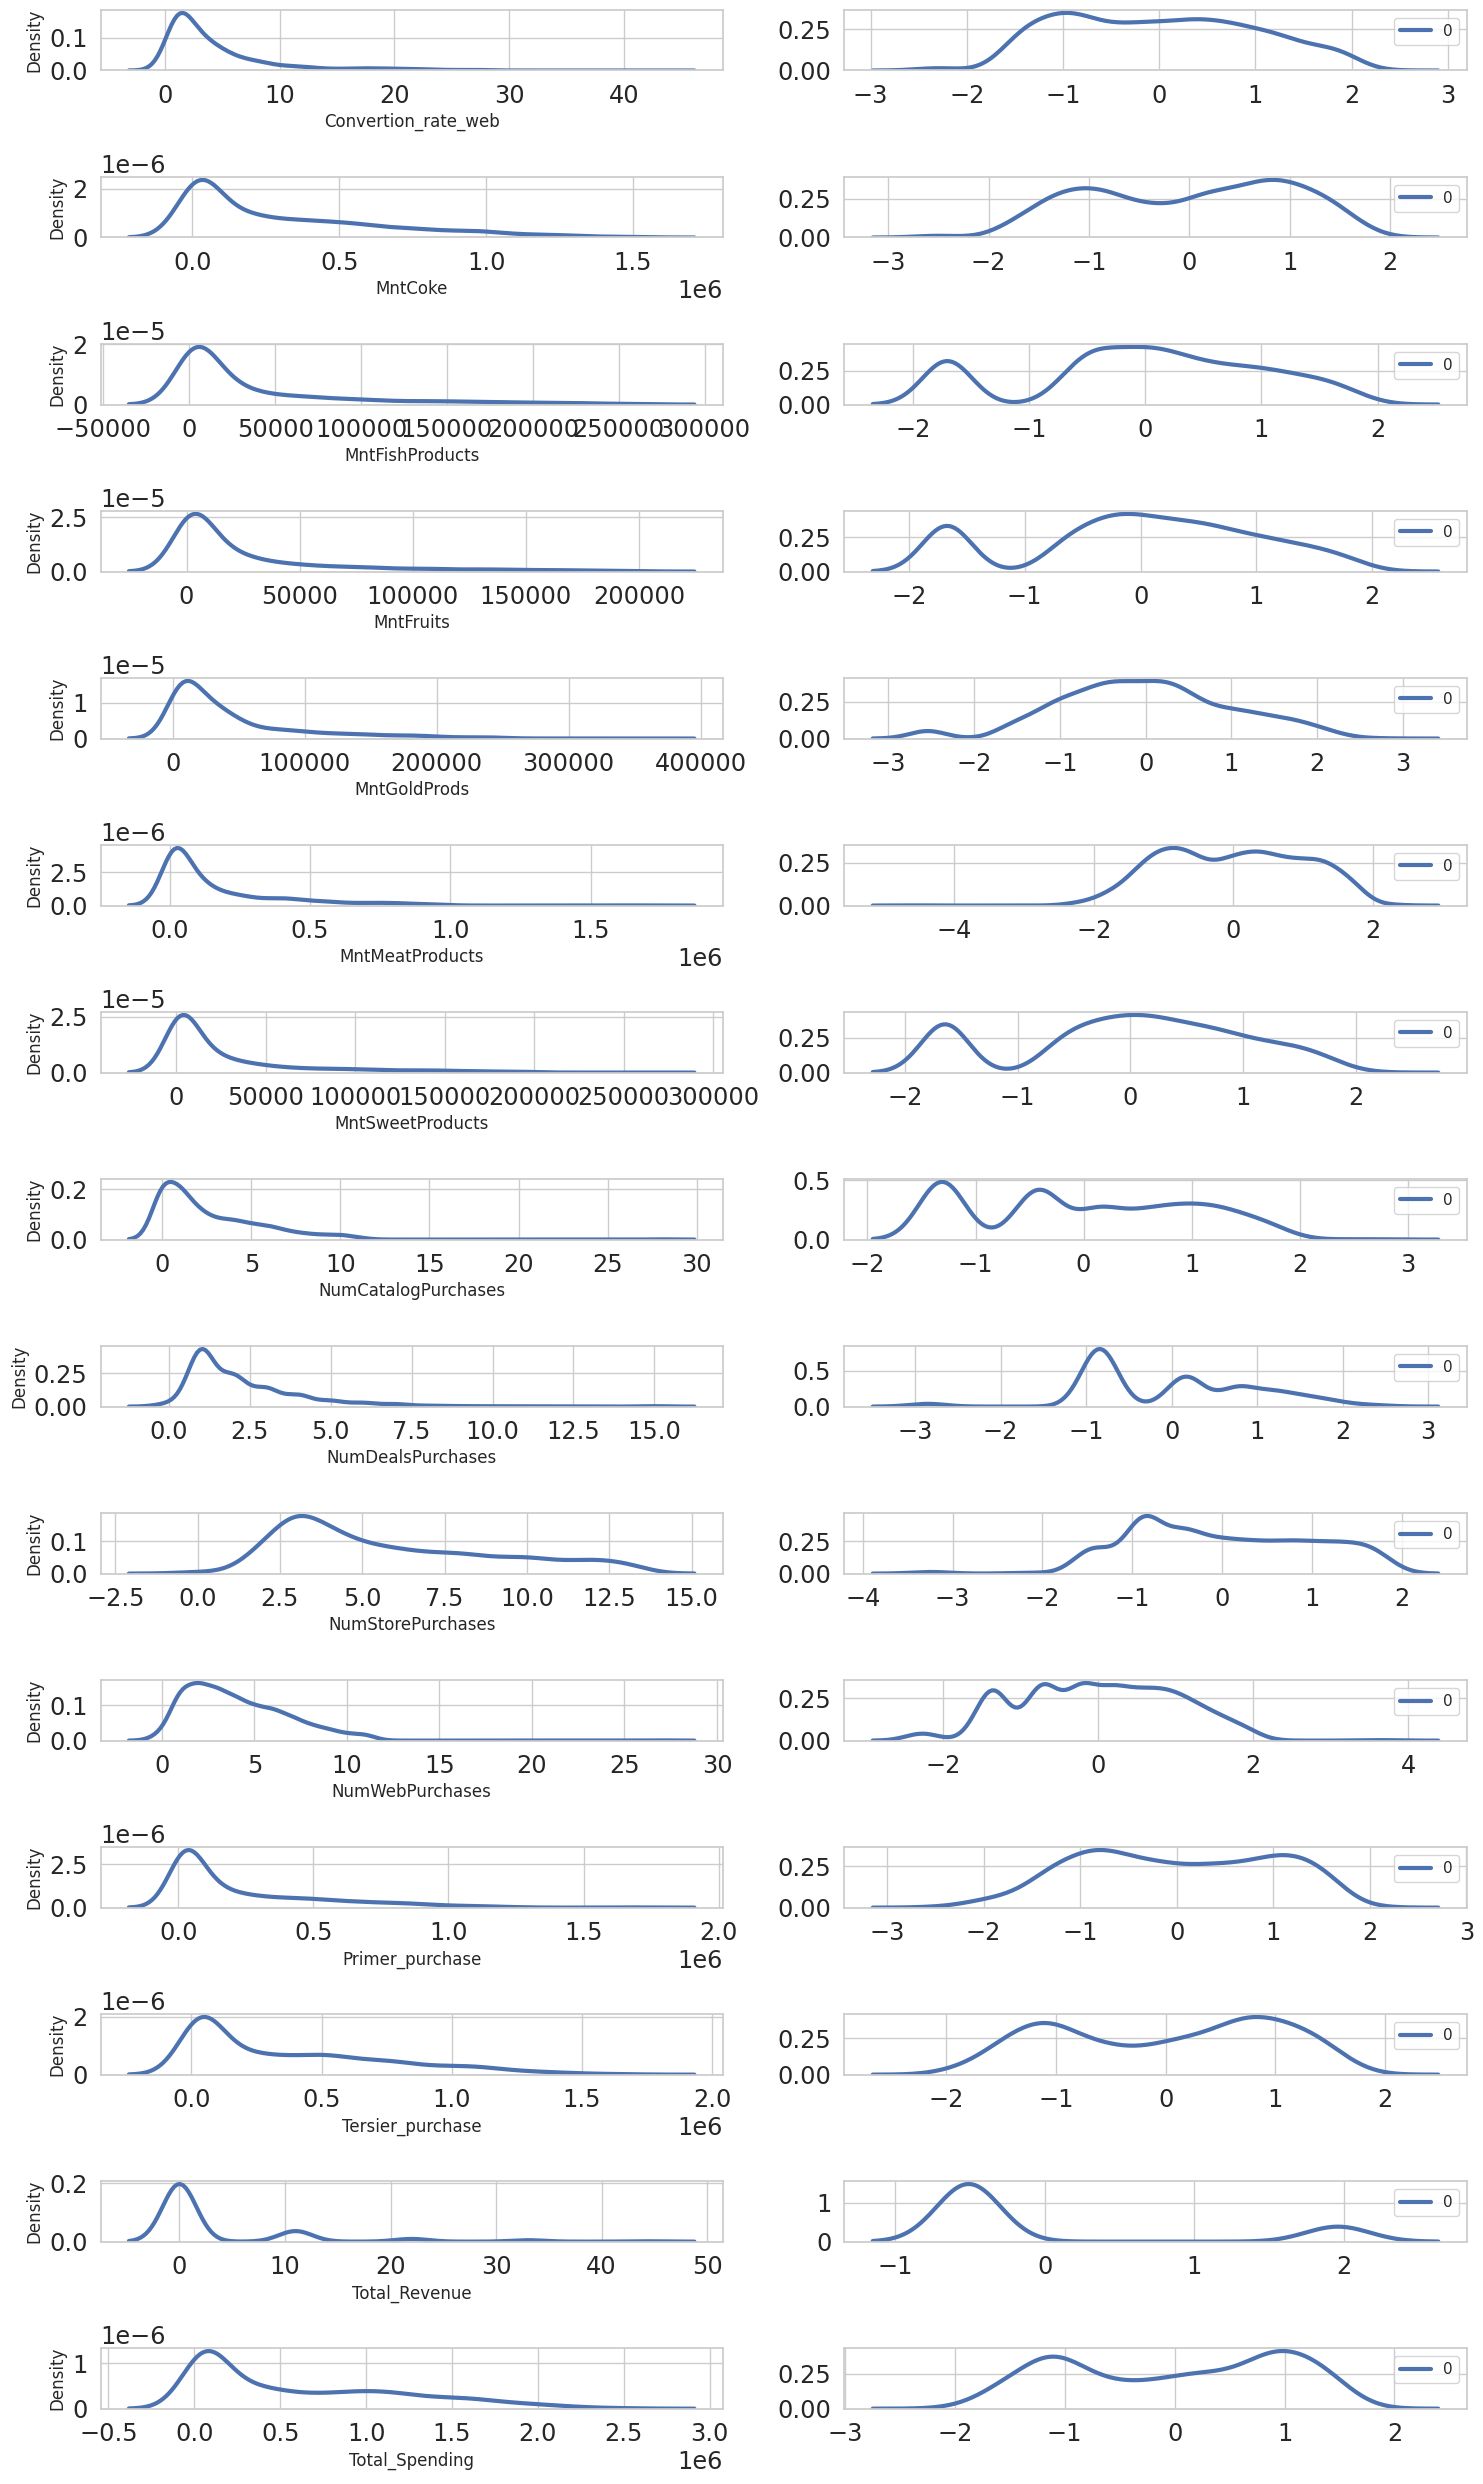

In [53]:
#with sklearn

from sklearn.preprocessing import PowerTransformer

fig, ax = plt.subplots(len(log_cols),2,figsize=(15,25))
for i in range(0,len(log_cols)):
    pt = PowerTransformer(method='yeo-johnson')
    data = pt.fit_transform(df[[log_cols[i]]]+1)
    kde1 = sns.kdeplot(df[log_cols[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(data, ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

In [54]:
pt = PowerTransformer(method='yeo-johnson')
df[log_cols] = pt.fit_transform(df[log_cols])

In [55]:
df[log_cols].describe()

,Convertion_rate_web,MntCoke,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,Primer_purchase,Tersier_purchase,Total_Revenue,Total_Spending
count,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236
mean,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.603,-2.538,-1.718,-1.685,-2.555,-4.683,-1.659,-1.338,-3.011,-3.392,-2.362,-2.506,-2.026,-0.510,-2.106
25%,-0.842,-0.893,-0.460,-0.647,-0.653,-0.824,-0.623,-1.338,-0.820,-0.863,-0.709,-0.825,-0.971,-0.510,-0.978
50%,-0.021,0.115,0.052,0.059,-0.038,0.020,0.068,0.159,0.158,-0.047,0.185,-0.041,0.134,-0.510,0.132
75%,0.748,0.867,0.754,0.735,0.636,0.828,0.725,0.800,0.744,0.806,0.824,0.886,0.868,-0.510,0.915
max,2.363,1.839,1.865,1.913,2.774,2.302,2.075,2.768,2.658,1.780,3.933,2.067,1.842,1.985,1.758


##Normalization

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[norm_cols] = pd.DataFrame(scaler.fit_transform(df[norm_cols]), columns=df[norm_cols].columns)

In [57]:
df[norm_cols].describe()

,Age,Income,Lifetime,Month_joined,NumWebVisitsMonth,Recency,Total_Purchases,Year_Birth,Year_joined
count,2236,2236,2236,2236,2236,2236,2236,2236,2236
mean,0.484,0.313,0.491,0.502,0.266,0.496,0.338,0.516,0.514
std,0.209,0.133,0.287,0.319,0.121,0.292,0.174,0.209,0.342
min,0,0,0,0,0,0,0,0,0
25%,0.339,0.210,0.343,0.182,0.150,0.242,0.182,0.339,0.500
50%,0.464,0.309,0.486,0.455,0.300,0.495,0.341,0.536,0.500
75%,0.661,0.414,0.657,0.818,0.350,0.747,0.477,0.661,0.500
max,1,1.000,1.000,1.000,1,1,1,1,1


##Feature Encoding



In [58]:
# Define the list of categorical column names
cat_str = ['Education', 'Marital_Status', 'Age_group', 'Income_Group','Living_Status','Education_Level']  # Add other categorical columns as needed

# Loop through categorical columns and print unique values
for x in cat_str:
    unq = list(df[x].unique())
    sorted(unq)

    print(f'===== {x} =====')
    if len(unq) >= 10:
        unq = list(unq[:10]) + ['.....']
        print(f'{unq}')
    else:
        print(f'{unq}')
    print()

===== Education =====
['S1', 'S3', 'S2', 'SMA', 'D3']

===== Marital_Status =====
['Lajang', 'Bertunangan', 'Menikah', 'Cerai', 'Janda', 'Duda']

===== Age_group =====
['Senior Adult', 'Young Adult', 'Adult']

===== Income_Group =====
['Medium', 'High', 'Low']

===== Living_Status =====
['Living Alone', 'Living with Partner']

===== Education_Level =====
['High', 'Low', 'Middle']



In [59]:
cat_str

['Education',
 'Marital_Status',
 'Age_group',
 'Income_Group',
 'Living_Status',
 'Education_Level']

##Label Encoding
###Menggunakan Metode Mapping

In [60]:
map_edu = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}

df['Education'] = df['Education'].map(map_edu)
df['Education'].unique()

array([2, 4, 3, 0, 1])

In [61]:
map_age = {
    'Young Adult' : 0,
    'Adult' : 1,
    'Senior Adult' : 2
}

df['Age_group'] = df['Age_group'].map(map_age)
df['Age_group'].unique()

array([2, 0, 1])

In [62]:
map_income = {
    'Low' : 0,
    'Medium' : 1,
    'High' : 2
}

df["Income_Group"] = df["Income_Group"].map(map_income)
df["Income_Group"].unique()

array([1, 2, 0])

In [63]:
map_education_level = {
    'Low' : 0,
    'Middle' : 1,
    'High' : 2
}

df["Education_Level"] = df["Education_Level"].map(map_education_level)
df["Education_Level"].unique()

array([2, 0, 1])

In [64]:
map_marital = {
    'Menikah' : 5,
    'Bertunangan' : 4,
    'Lajang' : 3,
    'Cerai' : 2,
    'Janda' : 1,
    'Duda' : 0
}

df['Marital_Status'] = df['Marital_Status'].map(map_marital)
df['Marital_Status'].unique()

array([3, 4, 5, 2, 1, 0])

In [65]:
map_living_status = {
    'Living Alone' : 0,
    'Living with Partner' : 1
}

df['Living_Status'] = df['Living_Status'].map(map_living_status)
df['Living_Status'].unique()

array([0, 1])

In [66]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_group,Number_Of_Children,Lifetime,Total_Spending,Primer_purchase,Tersier_purchase,Total_Purchases,Total_Campaign_Acc,Education_Level,Ever_Accept,Total_Revenue,Income_Group,Convertion_rate_web,Year_joined,Month_joined,Living_Status,Recency_sgmt
0,5524,0.304,2,3,0.351,0,0,2012-04-09,0.586,1.054,1.326,1.430,1.553,1.297,1.063,0.744,1.328,1.726,-0.418,0.350,0,0,0,0,0,0,3,11,1,0.696,2,0,0.771,1.315,1.480,1.115,0.568,0,2,0,-0.510,1,0.322,0,0.273,0,3
1,2174,0.250,2,3,0.278,1,1,2014-08-03,0.384,-1.184,-0.647,-1.352,-0.585,-0.623,-0.864,0.158,-1.360,-0.374,-1.420,0.250,0,0,0,0,0,0,3,11,0,0.750,2,2,0.200,-1.443,-1.401,-1.363,0.136,0,2,0,-0.510,1,-0.859,1,0.636,0,4
2,4141,0.446,2,4,0.435,0,0,2013-08-21,0.263,0.736,0.960,0.427,1.246,0.496,0.390,-0.820,1.328,0.159,1.243,0.200,0,0,0,0,0,0,3,11,0,0.554,2,0,0.543,0.660,0.734,0.671,0.477,0,2,0,-0.510,2,0.729,0.500,0.636,1,4
3,6182,0.786,2,4,0.155,1,0,2014-10-02,0.263,-1.184,-0.209,-0.698,-0.024,-0.292,-0.952,0.158,-0.709,-1.338,-0.418,0.300,0,0,0,0,0,0,3,11,0,0.214,0,1,0.257,-1.117,-0.644,-1.339,0.182,0,2,0,-0.510,0,-0.753,1,0.818,1,4
4,5324,0.732,4,5,0.352,1,0,2014-01-19,0.949,0.111,0.884,0.379,0.707,0.621,-0.352,1.443,0.526,0.524,0.273,0.250,0,0,0,0,0,0,3,11,0,0.268,1,1,0,0.178,0.509,0.036,0.432,0,2,0,-0.510,1,0.390,1,0,1,1


##Feature Selection

Drop Unnecessary Feature

In [67]:
clus_df = df.copy()
clus_df.drop(['ID', 'Year_Birth', 'Dt_Customer', 'Year_joined', 'Z_CostContact', 'Z_Revenue'], inplace=True, axis=1)
clus_df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_group,Number_Of_Children,Lifetime,Total_Spending,Primer_purchase,Tersier_purchase,Total_Purchases,Total_Campaign_Acc,Education_Level,Ever_Accept,Total_Revenue,Income_Group,Convertion_rate_web,Month_joined,Living_Status,Recency_sgmt
0,2,3,0.351,0,0,0.586,1.054,1.326,1.430,1.553,1.297,1.063,0.744,1.328,1.726,-0.418,0.350,0,0,0,0,0,0,1,0.696,2,0,0.771,1.315,1.480,1.115,0.568,0,2,0,-0.510,1,0.322,0.273,0,3
1,2,3,0.278,1,1,0.384,-1.184,-0.647,-1.352,-0.585,-0.623,-0.864,0.158,-1.360,-0.374,-1.420,0.250,0,0,0,0,0,0,0,0.750,2,2,0.200,-1.443,-1.401,-1.363,0.136,0,2,0,-0.510,1,-0.859,0.636,0,4
2,2,4,0.435,0,0,0.263,0.736,0.960,0.427,1.246,0.496,0.390,-0.820,1.328,0.159,1.243,0.200,0,0,0,0,0,0,0,0.554,2,0,0.543,0.660,0.734,0.671,0.477,0,2,0,-0.510,2,0.729,0.636,1,4
3,2,4,0.155,1,0,0.263,-1.184,-0.209,-0.698,-0.024,-0.292,-0.952,0.158,-0.709,-1.338,-0.418,0.300,0,0,0,0,0,0,0,0.214,0,1,0.257,-1.117,-0.644,-1.339,0.182,0,2,0,-0.510,0,-0.753,0.818,1,4
4,4,5,0.352,1,0,0.949,0.111,0.884,0.379,0.707,0.621,-0.352,1.443,0.526,0.524,0.273,0.250,0,0,0,0,0,0,0,0.268,1,1,0,0.178,0.509,0.036,0.432,0,2,0,-0.510,1,0.390,0,1,1


##Feature Scalling

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(clus_df)
clus_df = pd.DataFrame(scaler.transform(clus_df), columns= clus_df.columns)
clus_df.describe()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_group,Number_Of_Children,Lifetime,Total_Spending,Primer_purchase,Tersier_purchase,Total_Purchases,Total_Campaign_Acc,Education_Level,Ever_Accept,Total_Revenue,Income_Group,Convertion_rate_web,Month_joined,Living_Status,Recency_sgmt
count,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236
mean,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0,0.000,0.000,-0.000,0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.453,-3.348,-2.346,-0.825,-0.931,-1.697,-2.538,-1.685,-4.683,-1.718,-1.659,-2.555,-3.011,-2.362,-1.338,-3.392,-2.192,-0.280,-0.284,-0.279,-0.262,-0.117,-0.095,-0.419,-2.316,-1.978,-1.264,-1.710,-2.106,-2.506,-2.026,-1.937,-0.439,-4.551,-0.510,-0.510,-1.413,-2.603,-1.572,-1.348,-1.421
25%,-0.459,-0.743,-0.768,-0.825,-0.931,-0.868,-0.893,-0.647,-0.824,-0.460,-0.623,-0.653,-0.820,-0.709,-1.338,-0.863,-0.956,-0.280,-0.284,-0.279,-0.262,-0.117,-0.095,-0.419,-0.692,-0.493,-1.264,-0.516,-0.978,-0.825,-0.971,-0.895,-0.439,0.338,-0.510,-0.510,-1.413,-0.842,-1.002,-1.348,-0.715
50%,-0.459,0.126,-0.027,-0.825,-0.931,-0.004,0.115,0.059,0.020,0.052,0.068,-0.038,0.158,0.185,0.159,-0.047,0.281,-0.280,-0.284,-0.279,-0.262,-0.117,-0.095,-0.419,-0.094,-0.493,0.065,-0.019,0.132,-0.041,0.134,0.017,-0.439,0.338,-0.510,-0.510,0.001,-0.021,-0.148,0.742,-0.009
75%,0.537,0.994,0.763,1.033,0.906,0.860,0.867,0.735,0.828,0.754,0.725,0.636,0.744,0.824,0.800,0.806,0.693,-0.280,-0.284,-0.279,-0.262,-0.117,-0.095,-0.419,0.846,0.991,0.065,0.578,0.915,0.886,0.868,0.798,-0.439,0.338,-0.510,-0.510,0.001,0.748,0.990,0.742,0.696
max,1.534,0.994,5.159,2.890,2.743,1.723,1.839,1.913,2.302,1.865,2.075,2.774,2.658,3.933,2.768,1.780,6.051,3.566,3.520,3.578,3.812,8.575,10.526,2.386,2.470,0.991,2.725,1.772,1.758,2.067,1.842,3.795,5.456,0.338,1.960,1.985,1.415,2.363,1.560,0.742,1.402


In [69]:
clus_df.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Age                    0
Age_group              0
Number_Of_Children     0
Lifetime               0
Total_Spending         0
Primer_purchase        0
Tersier_purchase       0
Total_Purchases        0
Total_Campaign_Acc     0
Education_Level        0
Ever_Accept            0
Total_Revenue          0
Income_Group           0
Convertion_rate_web    0
Month_joined           0
Living_Status          0


#**Clustering Model**

Clustering with RFM Analysis

In [70]:
X = clus_df[['Recency', 'Total_Purchases', 'Total_Spending', 'Total_Campaign_Acc']]
X.head()

,Recency,Total_Purchases,Total_Spending,Total_Campaign_Acc
0,0.307,1.319,1.315,-0.439
1,-0.384,-1.156,-1.443,-0.439
2,-0.798,0.798,0.660,-0.439
3,-0.798,-0.895,-1.117,-0.439
4,1.550,0.538,0.178,-0.439


##Elbow Method K-Means Clustering

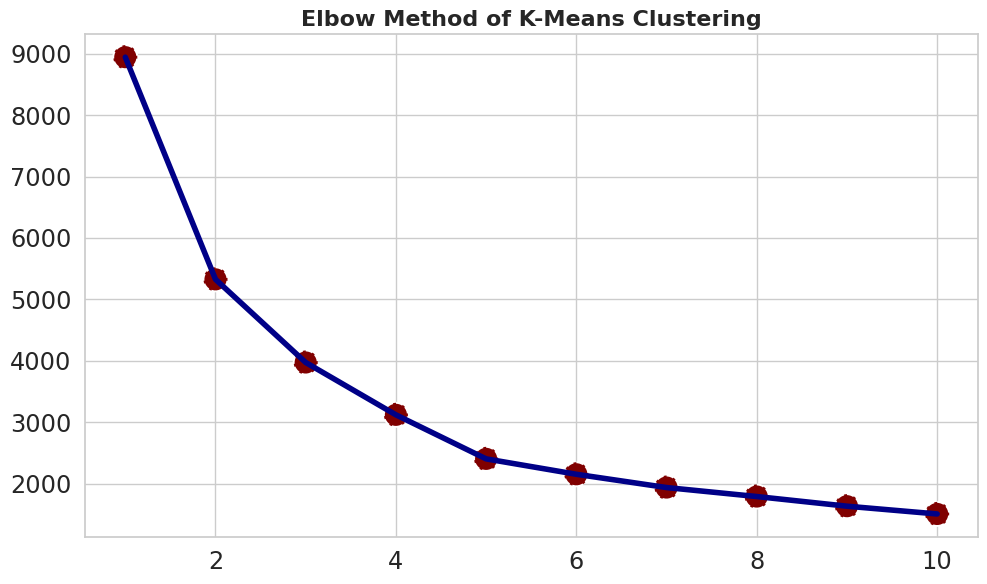

In [71]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=142)
    kmeans.fit(X.values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.title('Elbow Method of K-Means Clustering', fontsize=16, fontweight='bold')
plt.tight_layout()

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth=4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000', linestyle='--')
plt.show()

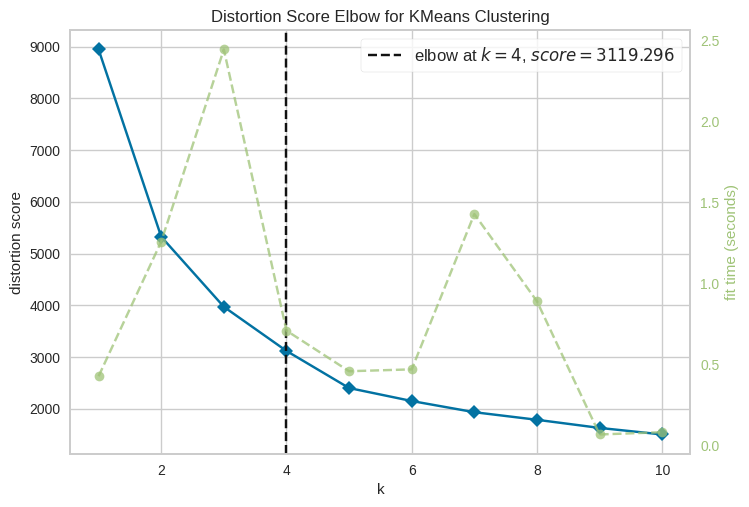

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [72]:
# visualisasi innertia vs k dengan parameter distortion
from yellowbrick.cluster import KElbowVisualizer

# fit model
model = KMeans(random_state=142)
visualizer = KElbowVisualizer(model, k=(1,11), metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(X)
visualizer.show()

Based on the graph above, with the optimal value distortion parameter k = 4

##Silhouette Score

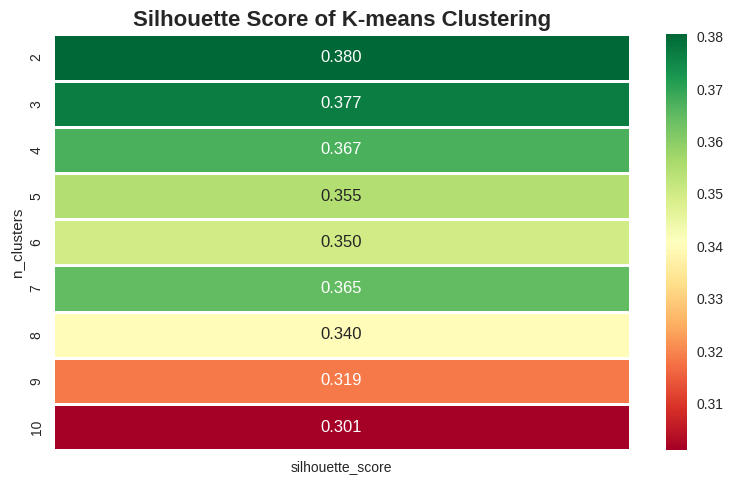

In [76]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2, 11)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=142)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=['n_clusters', 'silhouette_score'])
    pivot_km = pd.pivot_table(result, index='n_clusters', values='silhouette_score')

    plt.figure(figsize=(8, 5))
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.title('Silhouette Score of K-means Clustering', fontsize=16, fontweight='bold')
    plt.tight_layout()

visualize_silhouette_layer(X)

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5662344175321901
For n_clusters = 6 The average silhouette_score is : 0.4358297989156284


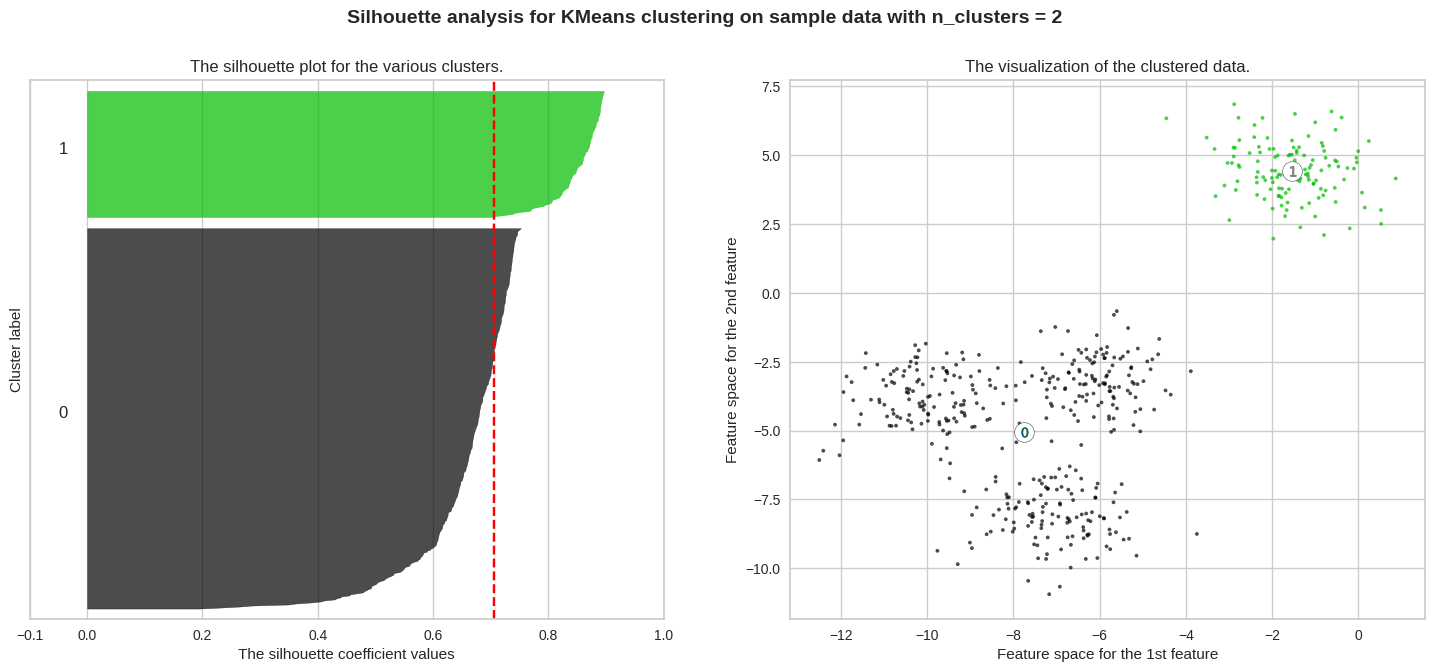

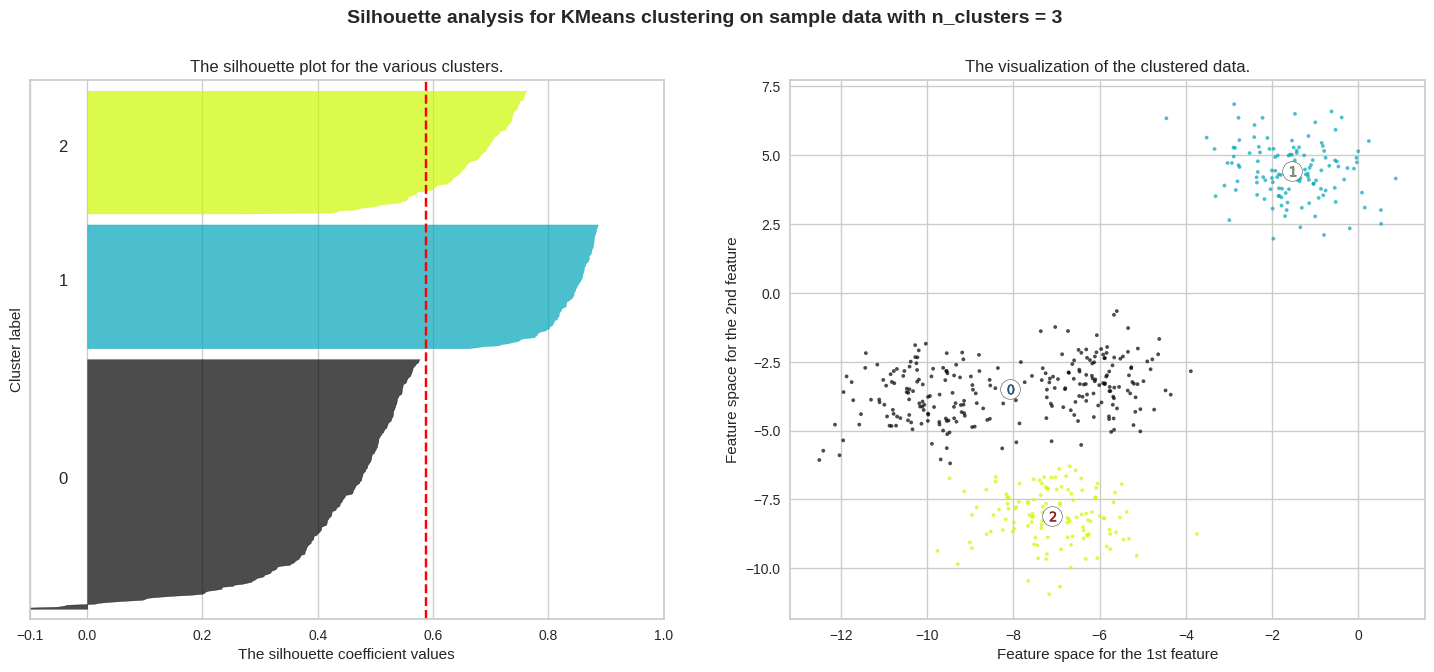

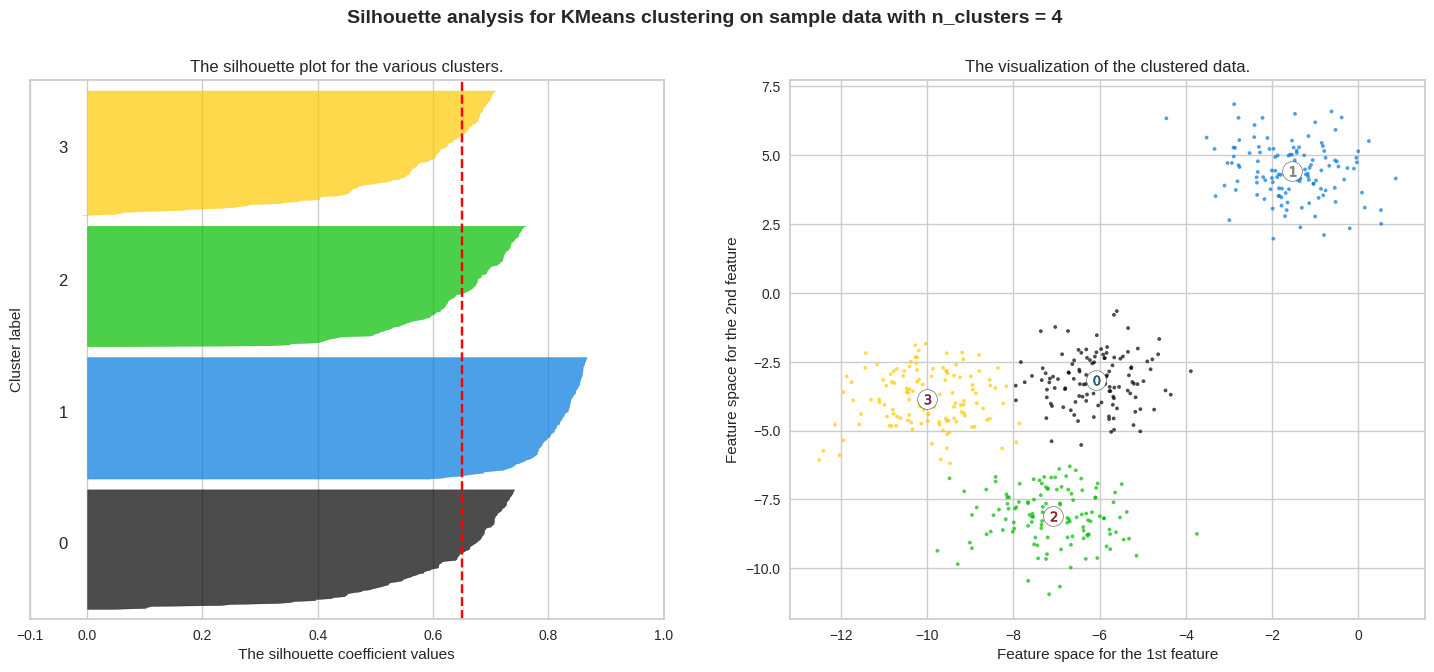

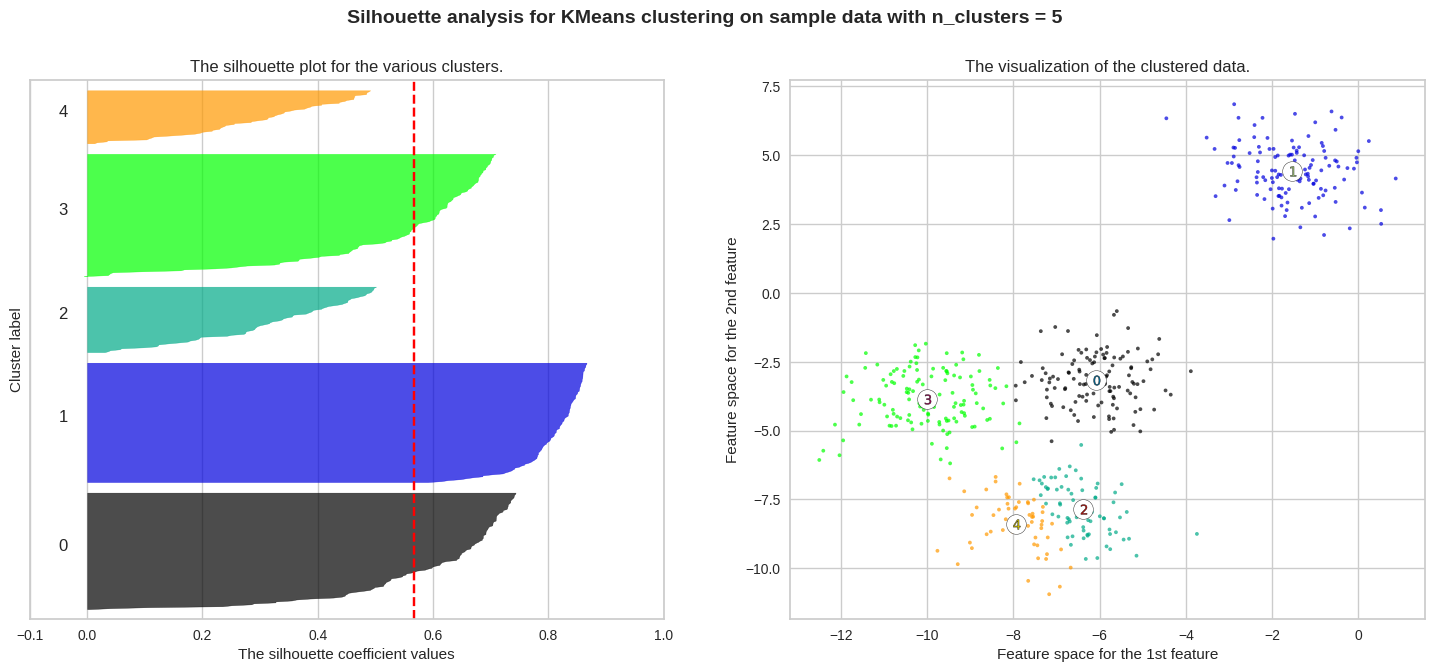

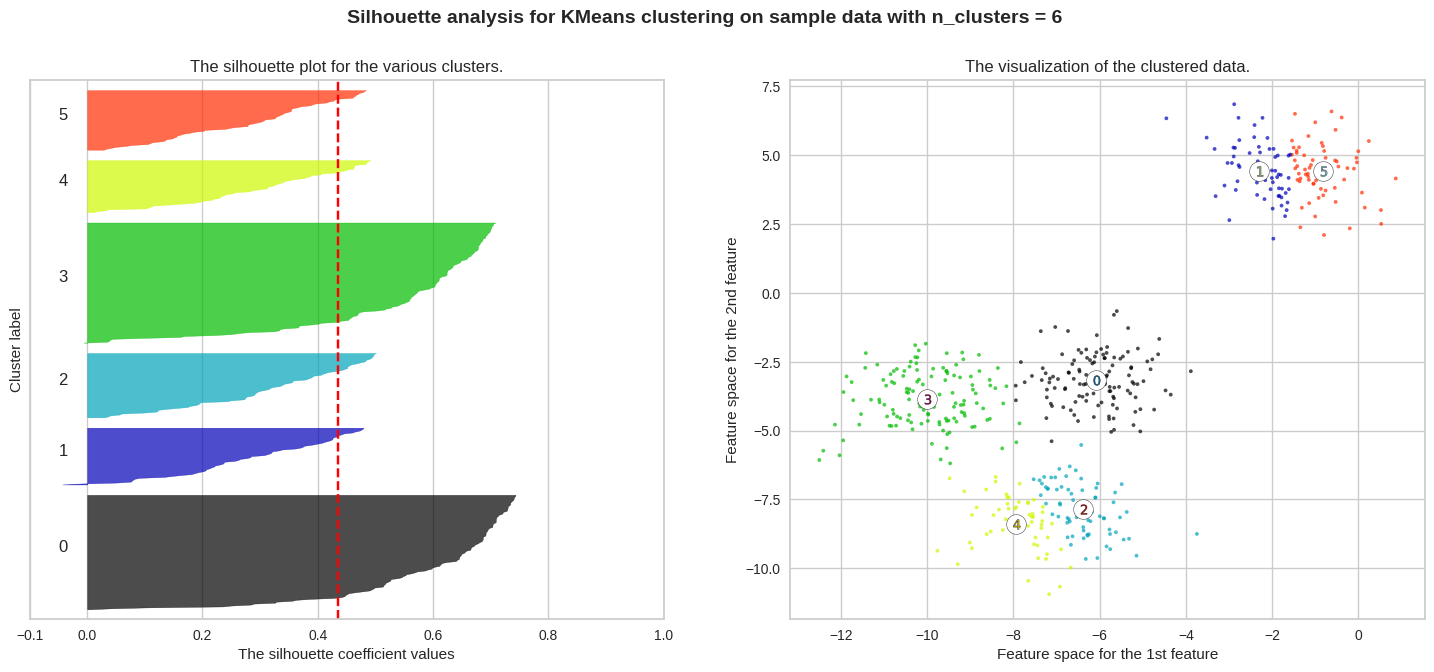

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
plt.show()

##**Insight:**

The silhouette plot shows that the n_clusters value of 3, 5 are a bad pick for the given data due to the presence of clusters with below average silhouette scores and also due to wide fluctuations in the size of the silhouette plots. Silhouette analysis is more ambivalent in deciding between 2, 4 and 6.

Also from the thickness of the silhouette plot the cluster size can be visualized. The silhouette plot for cluster 0 when n_clusters is equal to 2, is bigger in size owing to the grouping of the 3 sub clusters into one big cluster. However when the n_clusters is equal to 4, all the plots are more or less of similar thickness and hence are of similar sizes as can be also verified from the labelled scatter plot on the right. Data imbalance occurs at n_cluster = 6, in clusters 1, 2, 4 and 5.

Therefore, I chose n_cluster = 4, because it has the second best silhouette score and there is no data asymmetry.

#Tugas 4
- Melakukan interpretasi terhadap hasil cluster yang ada dari masing-masing feature
- Memilih cluster yang akan dilakukan marketing retargeting
- Menghitung potential impact dari hasil marketing retarketing dari cluster yang ada


In [77]:
kmeans = KMeans(n_clusters=4, random_state=142)
kmeans.fit(X.values)
X['Cluster_RFM1'] = kmeans.labels_
df['Cluster_RFM1'] = kmeans.labels_

In [78]:
from google.colab import drive
drive.mount('/content/drive')
source = '/content/drive/MyDrive/PORTOFOLIO/Mini Project 3/marketing_campaign_data.csv'
df_ori = pd.read_csv(source)
df_ori.drop('Unnamed: 0', axis=1, inplace=True)

df_ori.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [79]:
df_ori = df_ori.merge(df[['ID', 'Cluster_RFM1']],on='ID')
df_ori.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Cluster_RFM1
0,5524,1957,S1,Lajang,58138000,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2
1,2174,1954,S1,Lajang,46344000,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,1
2,4141,1965,S1,Bertunangan,71613000,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0
3,6182,1984,S1,Bertunangan,26646000,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1
4,5324,1981,S3,Menikah,58293000,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2


In [80]:
df_ori['Total_Purchases'] = df_ori['NumDealsPurchases'] + \
    df_ori['NumWebPurchases'] + \
    df_ori['NumCatalogPurchases'] + \
    df_ori['NumStorePurchases']

In [81]:
df_ori['Total_Spending']=df_ori['MntCoke']+ \
    df_ori['MntFruits']+ \
    df_ori['MntMeatProducts']+ \
    df_ori['MntFishProducts']+ \
    df_ori['MntSweetProducts']+ \
    df_ori['MntGoldProds']

In [82]:
df_ori['Total_Campaign_Acc']=df_ori['AcceptedCmp1'].astype('int64')+ \
    df_ori['AcceptedCmp2'].astype('int64')+ \
    df_ori['AcceptedCmp3'].astype('int64')+ \
    df_ori['AcceptedCmp4'].astype('int64')+ \
    df_ori['AcceptedCmp5'].astype('int64')

In [83]:
df_ori['Cluster_RFM1'].value_counts().to_frame().reset_index().rename(columns={'index':'clusters', 'clusters': 'total_customers'})

,clusters,Cluster_RFM1
0,1,941
1,2,609
2,0,550
3,3,136


In [84]:
df_ori.groupby('Cluster_RFM1').agg({'Recency': 'mean',
                                    'Total_Purchases': 'mean',
                                    'Total_Spending': 'mean',
                                    'Total_Campaign_Acc': 'median'})

,Recency,Total_Purchases,Total_Spending,Total_Campaign_Acc
Cluster_RFM1,,,,
0,22.545,20.544,919510.909,0
1,48.910,7.220,79032.944,0
2,73.567,20.184,930284.072,0
3,48.515,21.103,1531926.471,2


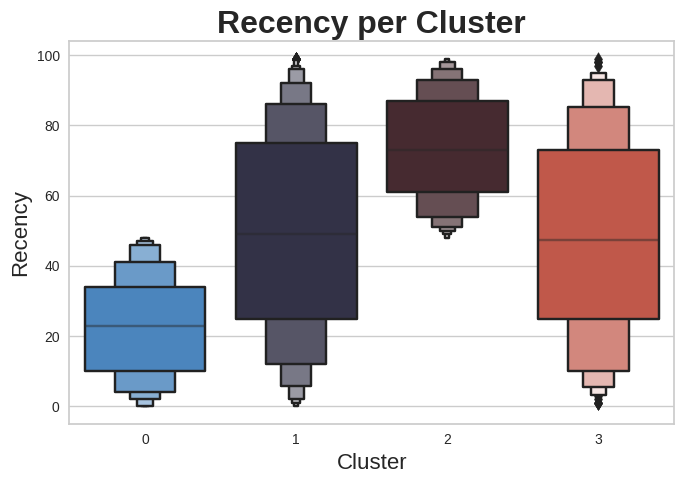

In [85]:
plt.figure(figsize=(7, 5))
sns.boxenplot(x=df_ori['Cluster_RFM1'], y=df_ori['Recency'], palette='icefire')
plt.title('Recency per Cluster', fontsize=23, fontweight='bold')
plt.ylabel('Recency', fontsize=16)
plt.xlabel('Cluster', fontsize=16)
plt.tight_layout()

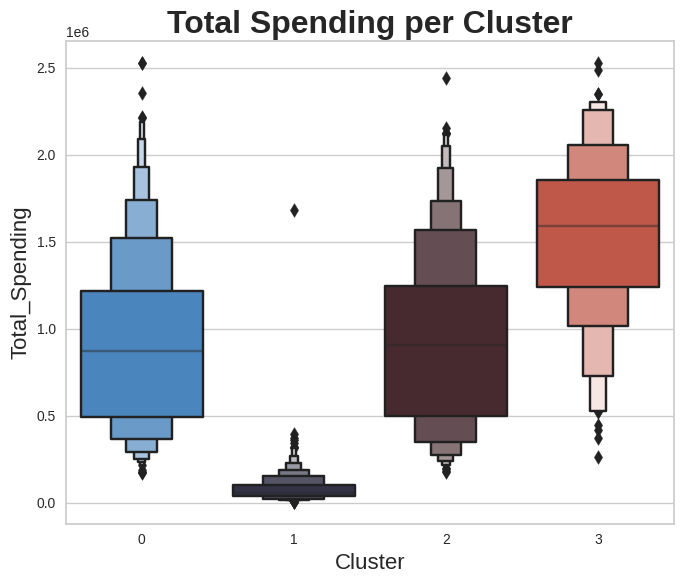

In [86]:
plt.figure(figsize=(7, 6))
sns.boxenplot(x=df_ori['Cluster_RFM1'], y=df_ori['Total_Spending'], palette='icefire')
plt.title('Total Spending per Cluster', fontsize=23, fontweight='bold')
plt.ylabel('Total_Spending', fontsize=16)
plt.xlabel('Cluster', fontsize=16)
plt.tight_layout()

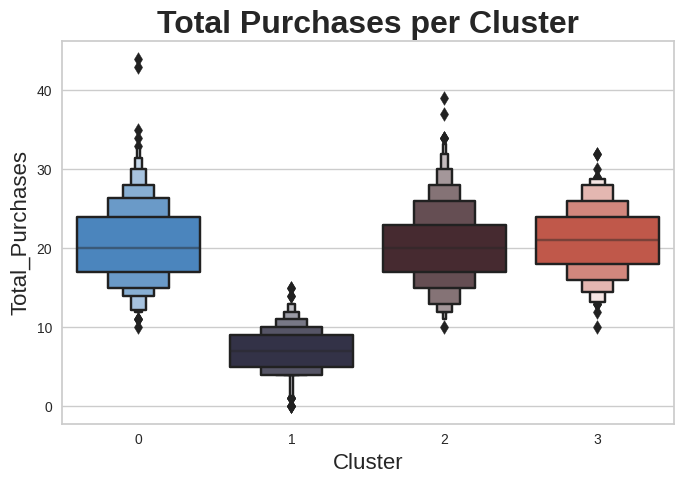

In [87]:
plt.figure(figsize=(7, 5))
sns.boxenplot(x=df_ori['Cluster_RFM1'], y=df_ori['Total_Purchases'], palette='icefire')
plt.title('Total Purchases per Cluster', fontsize=23, fontweight='bold')
plt.ylabel('Total_Purchases', fontsize=16)
plt.xlabel('Cluster', fontsize=16)
plt.tight_layout()

Text(0.5, 1.0, 'Total Visit Web per Cluster')

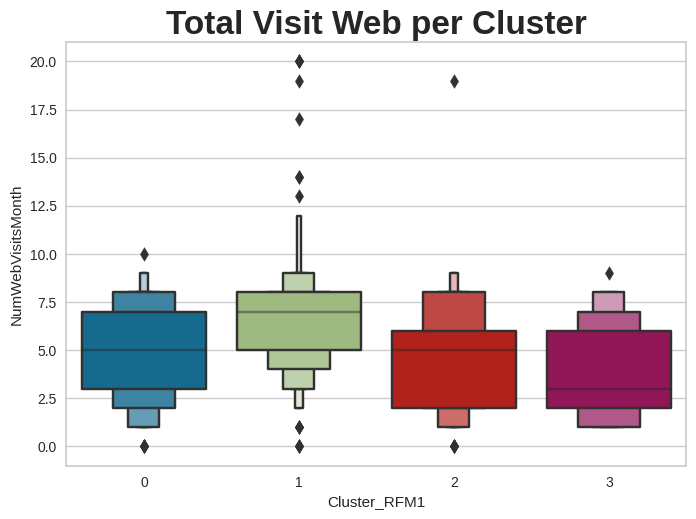

In [98]:
sns.boxenplot(x=df_ori['Cluster_RFM1'], y=df_ori['NumWebVisitsMonth'])
plt.title('Total Visit Web per Cluster',fontsize=24, fontweight='bold')

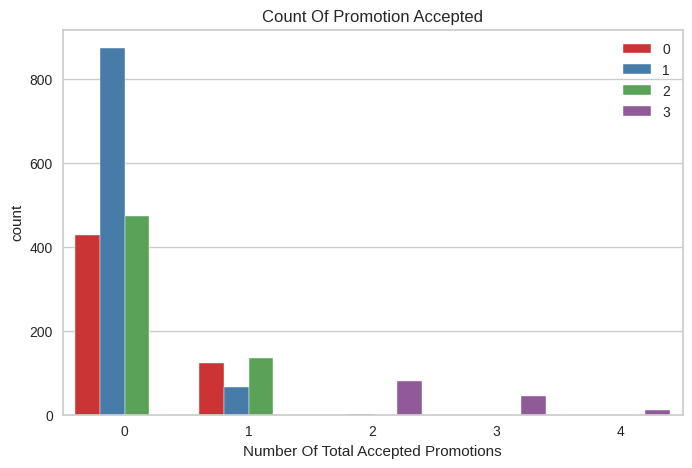

In [ ]:
plt.figure(figsize=(8, 5))
pal = sns.color_palette("Set1")  # Definisikan palet warna yang sesuai

pl = sns.countplot(x=df_ori['Total_Campaign_Acc'], hue=df_ori['Cluster_RFM1'], palette=pal)
pl.set_title('Count Of Promotion Accepted')
pl.set_xlabel('Number Of Total Accepted Promotions')

# Memindahkan legenda ke lokasi yang sesuai
pl.legend(loc='upper right')

plt.show()

Sejauh ini belum ada respons yang luar biasa terhadap kampanye tersebut. Sangat sedikit peserta secara keseluruhan. Selain itu, tidak ada satu bagian pun yang mengambil kelimanya. Mungkin kampanye yang lebih tertarget dan terencana diperlukan untuk meningkatkan penjualan.

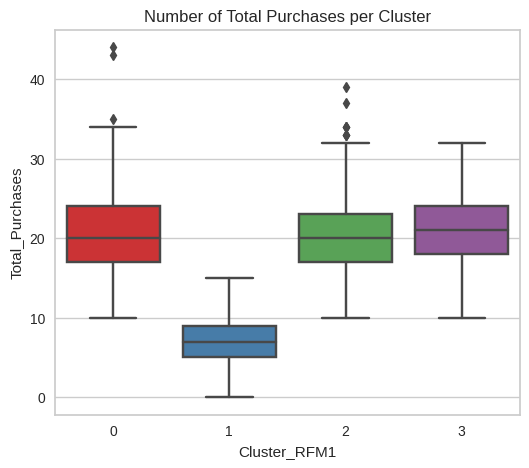

In [ ]:
plt.figure(figsize=(6,5))
pl=sns.boxplot(y=df_ori["Total_Purchases"],x=df_ori["Cluster_RFM1"], palette= pal)
pl.set_title("Number of Total Purchases per Cluster")
plt.show()

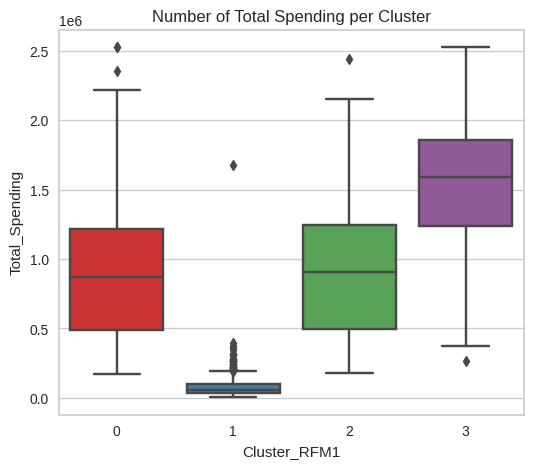

In [ ]:
plt.figure(figsize=(6,5))
pl=sns.boxplot(y=df_ori["Total_Spending"],x=df_ori["Cluster_RFM1"], palette= pal)
pl.set_title("Number of Total Spending per Cluster")
plt.show()

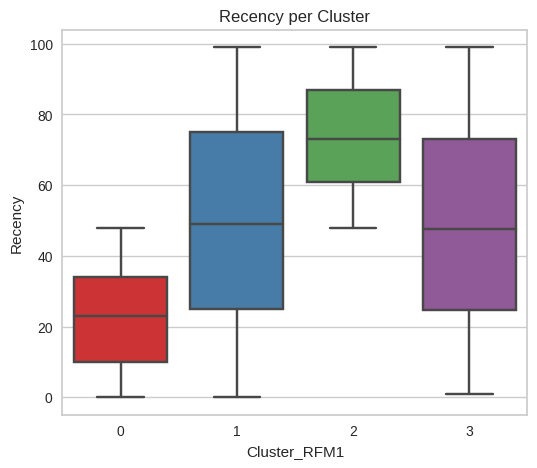

In [ ]:
plt.figure(figsize=(6,5))
pl=sns.boxplot(y=df_ori["Recency"],x=df_ori["Cluster_RFM1"], palette= pal)
pl.set_title("Recency per Cluster")
plt.show()

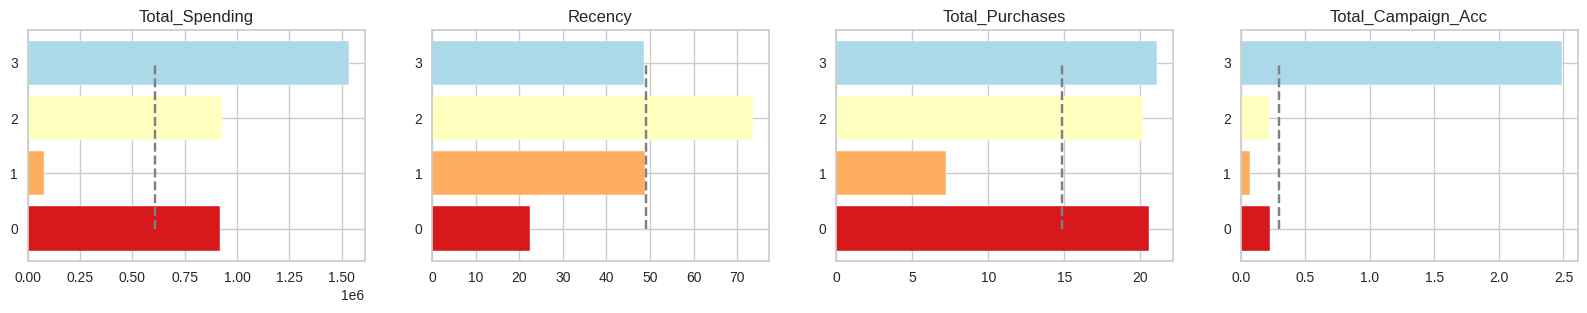

In [ ]:
# melihat rata-rata variabel RFM antar cluster
c = ["#d7191c","#fdae61","#ffffbf","#abd9e9","#2c7bb6"]

LRFM= ['Total_Spending','Recency','Total_Purchases','Total_Campaign_Acc']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,3])
    i = 1
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        ax.vlines(df_ori[col].mean(), ymin=0, ymax=3, color='grey', linestyle='--')
        g = df_ori.groupby('Cluster_RFM1')
        x = g[col].mean().index
        y = g[col].mean().values
        ax.barh(x,y, color=c)
        plt.title(col)
        i = i+1

dist_list(LRFM)

#**Interpretasi**

###**Cluster 0: Total Spending High, Recency Low, Total Purchases High, Total Campaign Accepted Low**

**Interpretasi:**

Pelanggan dalam cluster ini memiliki total pengeluaran yang tinggi, baru-baru ini berbelanja, melakukan pembelian dengan frekuensi tinggi, tetapi menerima kampanye pemasaran dengan frekuensi rendah.

**Rekomendasi:**
- **Kampanye Personalisasi:** Tingkatkan upaya dalam mengirimkan kampanye pemasaran yang lebih personal dan relevan kepada pelanggan dalam cluster ini.
- **Penawaran Diskon:** Tawarkan penawaran khusus atau diskon kepada pelanggan untuk mendorong pembelian lebih lanjut.
- **Program Loyalitas:** Ajak pelanggan untuk bergabung dengan program loyalitas yang memberikan insentif tambahan atas pembelian yang tinggi.
- **Pemberitahuan Produk Baru:** Informasikan mereka tentang produk baru yang sesuai dengan minat dan preferensi mereka.

###**Cluster 1: Total Spending Low, Recency Average, Total Purchases Low, Total Campaign Accepted Low**

**Interpretasi:**

Pelanggan dalam cluster ini memiliki total pengeluaran yang rendah, belanja relatif baru-baru ini, melakukan pembelian dengan frekuensi rendah, dan menerima kampanye pemasaran dengan frekuensi rendah.

**Rekomendasi:**
- Reaktivasi: Kirimkan penawaran atau diskon menarik untuk mendorong pelanggan kembali berbelanja.
- Penawaran Spesial: Tawarkan penawaran khusus atau diskon terbatas waktu untuk mendorong pembelian lebih lanjut.
- Konten Edukatif: Kirimkan konten yang memberikan informasi bermanfaat mengenai produk atau cara penggunaan untuk meningkatkan minat dan keterlibatan.

###**Cluster 2: Total Spending High, Recency High, Total Purchases High, Total Campaign Accepted Low**

**Interpretasi:**

Pelanggan dalam cluster ini memiliki total pengeluaran yang tinggi, telah lama tidak berbelanja , melakukan pembelian dengan frekuensi tinggi, dan menerima kampanye pemasaran dengan frekuensi rendah.

**Rekomendasi:**
- Kampanye Personalisasi: Lakukan upaya untuk mengirimkan kampanye yang lebih relevan dan menarik kepada pelanggan dalam cluster ini.
- Penawaran Eksklusif: Tawarkan penawaran eksklusif atau diskon khusus kepada pelanggan dalam klaster ini. Ini dapat menjadi insentif tambahan bagi mereka untuk berbelanja kembali meskipun menerima kampanye pemasaran dengan frekuensi rendah
- Program Loyalitas: Ajak mereka untuk bergabung dengan program loyalitas yang memberikan manfaat eksklusif bagi pelanggan setia.
- Eksperimen dengan Media dan Saluran Berbeda: Cobalah untuk menguji kampanye melalui media atau saluran yang berbeda. Beberapa pelanggan mungkin lebih merespons jika kampanye disampaikan melalui email, SMS, media sosial, atau iklan online. Eksperimen ini dapat membantu Anda menemukan saluran komunikasi yang paling efektif untuk klaster ini.

###**Cluster 3:Total Spending High, Recency Average, Total Purchases High, Total Campaign Accepted High**

**Interpretasi:**

Pelanggan dalam cluster ini memiliki total pengeluaran yang tinggi, belanja dengan frekuensi menengah, melakukan pembelian dengan frekuensi tinggi, dan menerima kampanye pemasaran dengan frekuensi tinggi.

**Rekomendasi:**
- Pertahankan Keterlibatan: Terus berkomunikasi secara rutin melalui kampanye pemasaran yang relevan dan menarik.
- Penawaran Khusus: Berikan penawaran eksklusif atau diskon kepada pelanggan sebagai penghargaan atas keterlibatan mereka.
- Program Hadiah: Pertimbangkan untuk memperkenalkan program hadiah yang memberikan insentif atas partisipasi aktif dan pembelian.

Berdasarkan analisis ini, perusahaan dapat mengambil tindakan yang lebih cermat dan disesuaikan untuk setiap klaster pelanggan. Dengan memahami preferensi dan perilaku pembelian masing-masing klaster, perusahaan dapat meningkatkan pengalaman pelanggan dan mengoptimalkan strategi pemasaran perusahaan.

##**Memilih Cluster dan Menghitung Potential Loyalist**

In [90]:
# Memilih cluster yang akan dilakukan marketing retargeting (Cluster 0)
selected_cluster = 0

# Menghitung potential impact dari hasil marketing retargeting
total_customers_in_selected_cluster = len(df_ori[df_ori['Cluster_RFM1'] == selected_cluster])
average_total_spending_in_selected_cluster = df_ori[df_ori['Cluster_RFM1'] == selected_cluster]['Total_Spending'].mean()
average_total_purchases_in_selected_cluster = df_ori[df_ori['Cluster_RFM1'] == selected_cluster]['Total_Purchases'].mean()
average_recency_in_selected_cluster = df_ori[df_ori['Cluster_RFM1'] == selected_cluster]['Recency'].mean()
median_total_campaign_accepted_in_selected_cluster= df_ori[df_ori['Cluster_RFM1'] == selected_cluster]['Total_Campaign_Acc'].median()
median_NumWebVisitsMonth_in_selected_cluster= df_ori[df_ori['Cluster_RFM1'] == selected_cluster]['NumWebVisitsMonth'].median()

potential_impact_based_on_total_spending = total_customers_in_selected_cluster * average_total_spending_in_selected_cluster
potential_impact_based_on_total_purchases = total_customers_in_selected_cluster * average_total_purchases_in_selected_cluster
potential_impact_based_on_recency = total_customers_in_selected_cluster * average_recency_in_selected_cluster
potential_impact_based_on_total_campaign_accepted = total_customers_in_selected_cluster * median_total_campaign_accepted_in_selected_cluster
potential_impact_based_on_NumWebVisitsMonth = total_customers_in_selected_cluster * median_NumWebVisitsMonth_in_selected_cluster

print("\nCluster yang dipilih:", selected_cluster)
print("Jumlah pelanggan dalam cluster:", total_customers_in_selected_cluster)
print("Rata-rata total pengeluaran dalam cluster:", average_total_spending_in_selected_cluster)
print("Rata-rata total pembelian dalam cluster:", average_total_purchases_in_selected_cluster)
print("Rata-rata waktu sejak pembelian terakhir dalam cluster:", average_recency_in_selected_cluster)
print("Median total kampanye yang diterima dalam cluster:", median_total_campaign_accepted_in_selected_cluster)
print("Median visit website dalam cluster:", median_NumWebVisitsMonth_in_selected_cluster)
print("Potensi dampak berdasarkan rata-rata total pengeluaran:", potential_impact_based_on_total_spending)
print("Potensi dampak berdasarkan rata-rata total pembelian:", potential_impact_based_on_total_purchases)
print("Potensi dampak berdasarkan rata-rata waktu sejak pembelian terakhir:", potential_impact_based_on_recency)
print("Potensi dampak berdasarkan median total kampanye yang diterima:", potential_impact_based_on_total_campaign_accepted)
print("Potensi dampak berdasarkan median visit website yang diterima:", potential_impact_based_on_NumWebVisitsMonth)


Cluster yang dipilih: 0
Jumlah pelanggan dalam cluster: 550
Rata-rata total pengeluaran dalam cluster: 919510.9090909091
Rata-rata total pembelian dalam cluster: 20.543636363636363
Rata-rata waktu sejak pembelian terakhir dalam cluster: 22.545454545454547
Median total kampanye yang diterima dalam cluster: 0.0
Median visit website dalam cluster: 5.0
Potensi dampak berdasarkan rata-rata total pengeluaran: 505731000.0
Potensi dampak berdasarkan rata-rata total pembelian: 11299.0
Potensi dampak berdasarkan rata-rata waktu sejak pembelian terakhir: 12400.0
Potensi dampak berdasarkan median total kampanye yang diterima: 0.0
Potensi dampak berdasarkan median visit website yang diterima: 2750.0


**Cluster 0**
- Kelompok ini adalah kelompok dengan jumlah pelanggan ketiga terbesar sebanyak 550 orang
- Pelanggan di kelompok ini mempunyai rata-rata waktu sejak pembelian terakhir (22 hari), dan rata-rata total pembelian (21 items) itu berarti mereka sering berbelanja dan mereka menghabiskan banyak uang di platform kami (sekitar Rp 919k/tahun)
- Pelanggan dalam kelompok ini kurang dalam merespon kampanye
- Kelompok ini mengunjungi website cukup sering dengan median sebanyak 5 kali dalam sebulan

In [91]:
# Memilih cluster yang akan dilakukan marketing retargeting (Cluster 1)
selected_cluster = 1

# Menghitung potential impact dari hasil marketing retargeting
total_customers_in_selected_cluster = len(df_ori[df_ori['Cluster_RFM1'] == selected_cluster])
average_total_spending_in_selected_cluster = df_ori[df_ori['Cluster_RFM1'] == selected_cluster]['Total_Spending'].mean()
average_total_purchases_in_selected_cluster = df_ori[df_ori['Cluster_RFM1'] == selected_cluster]['Total_Purchases'].mean()
average_recency_in_selected_cluster = df_ori[df_ori['Cluster_RFM1'] == selected_cluster]['Recency'].mean()
median_total_campaign_accepted_in_selected_cluster= df_ori[df_ori['Cluster_RFM1'] == selected_cluster]['Total_Campaign_Acc'].median()
median_NumWebVisitsMonth_in_selected_cluster= df_ori[df_ori['Cluster_RFM1'] == selected_cluster]['NumWebVisitsMonth'].median()

potential_impact_based_on_total_spending = total_customers_in_selected_cluster * average_total_spending_in_selected_cluster
potential_impact_based_on_total_purchases = total_customers_in_selected_cluster * average_total_purchases_in_selected_cluster
potential_impact_based_on_recency = total_customers_in_selected_cluster * average_recency_in_selected_cluster
potential_impact_based_on_total_campaign_accepted = total_customers_in_selected_cluster * median_total_campaign_accepted_in_selected_cluster
potential_impact_based_on_NumWebVisitsMonth = total_customers_in_selected_cluster * median_NumWebVisitsMonth_in_selected_cluster

print("\nCluster yang dipilih:", selected_cluster)
print("Jumlah pelanggan dalam cluster:", total_customers_in_selected_cluster)
print("Rata-rata total pengeluaran dalam cluster:", average_total_spending_in_selected_cluster)
print("Rata-rata total pembelian dalam cluster:", average_total_purchases_in_selected_cluster)
print("Rata-rata waktu sejak pembelian terakhir dalam cluster:", average_recency_in_selected_cluster)
print("Median total kampanye yang diterima dalam cluster:", median_total_campaign_accepted_in_selected_cluster)
print("Median visit website dalam cluster:", median_NumWebVisitsMonth_in_selected_cluster)
print("Potensi dampak berdasarkan rata-rata total pengeluaran:", potential_impact_based_on_total_spending)
print("Potensi dampak berdasarkan rata-rata total pembelian:", potential_impact_based_on_total_purchases)
print("Potensi dampak berdasarkan rata-rata waktu sejak pembelian terakhir:", potential_impact_based_on_recency)
print("Potensi dampak berdasarkan median total kampanye yang diterima:", potential_impact_based_on_total_campaign_accepted)
print("Potensi dampak berdasarkan median visit website yang diterima:", potential_impact_based_on_NumWebVisitsMonth)


Cluster yang dipilih: 1
Jumlah pelanggan dalam cluster: 941
Rata-rata total pengeluaran dalam cluster: 79032.94367693942
Rata-rata total pembelian dalam cluster: 7.219978746014878
Rata-rata waktu sejak pembelian terakhir dalam cluster: 48.909670563230605
Median total kampanye yang diterima dalam cluster: 0.0
Median visit website dalam cluster: 7.0
Potensi dampak berdasarkan rata-rata total pengeluaran: 74370000.0
Potensi dampak berdasarkan rata-rata total pembelian: 6794.0
Potensi dampak berdasarkan rata-rata waktu sejak pembelian terakhir: 46024.0
Potensi dampak berdasarkan median total kampanye yang diterima: 0.0
Potensi dampak berdasarkan median visit website yang diterima: 6587.0


**Cluster 1**
- Kelompok ini adalah kelompok dengan jumlah pelanggan terbesar sebanyak 941 orang
- pelanggan di kelompok ini mempunyai rata-rata waktu sejak pembelian terakhir (48 hari), dan rata-rata total pembelian (7 items) itu berarti mereka bukan pembeli rutin dan mereka menghabiskan sedikit uang di platform kami (sekitar Rp 79k/tahun)
- pelanggan dalam kelompok ini kurang dalam merespon kampanye
-  Kelompok ini mengunjungi website paling sering dengan median sebanyak 7 kali dalam sebulan

In [92]:
# Memilih cluster yang akan dilakukan marketing retargeting (Cluster 2)
selected_cluster = 2

# Menghitung potential impact dari hasil marketing retargeting
total_customers_in_selected_cluster = len(df_ori[df_ori['Cluster_RFM1'] == selected_cluster])
average_total_spending_in_selected_cluster = df_ori[df_ori['Cluster_RFM1'] == selected_cluster]['Total_Spending'].mean()
average_total_purchases_in_selected_cluster = df_ori[df_ori['Cluster_RFM1'] == selected_cluster]['Total_Purchases'].mean()
average_recency_in_selected_cluster = df_ori[df_ori['Cluster_RFM1'] == selected_cluster]['Recency'].mean()
median_total_campaign_accepted_in_selected_cluster= df_ori[df_ori['Cluster_RFM1'] == selected_cluster]['Total_Campaign_Acc'].median()
median_NumWebVisitsMonth_in_selected_cluster= df_ori[df_ori['Cluster_RFM1'] == selected_cluster]['NumWebVisitsMonth'].median()

potential_impact_based_on_total_spending = total_customers_in_selected_cluster * average_total_spending_in_selected_cluster
potential_impact_based_on_total_purchases = total_customers_in_selected_cluster * average_total_purchases_in_selected_cluster
potential_impact_based_on_recency = total_customers_in_selected_cluster * average_recency_in_selected_cluster
potential_impact_based_on_total_campaign_accepted = total_customers_in_selected_cluster * median_total_campaign_accepted_in_selected_cluster
potential_impact_based_on_NumWebVisitsMonth = total_customers_in_selected_cluster * median_NumWebVisitsMonth_in_selected_cluster

print("\nCluster yang dipilih:", selected_cluster)
print("Jumlah pelanggan dalam cluster:", total_customers_in_selected_cluster)
print("Rata-rata total pengeluaran dalam cluster:", average_total_spending_in_selected_cluster)
print("Rata-rata total pembelian dalam cluster:", average_total_purchases_in_selected_cluster)
print("Rata-rata waktu sejak pembelian terakhir dalam cluster:", average_recency_in_selected_cluster)
print("Median total kampanye yang diterima dalam cluster:", median_total_campaign_accepted_in_selected_cluster)
print("Median visit website dalam cluster:", median_NumWebVisitsMonth_in_selected_cluster)
print("Potensi dampak berdasarkan rata-rata total pengeluaran:", potential_impact_based_on_total_spending)
print("Potensi dampak berdasarkan rata-rata total pembelian:", potential_impact_based_on_total_purchases)
print("Potensi dampak berdasarkan rata-rata waktu sejak pembelian terakhir:", potential_impact_based_on_recency)
print("Potensi dampak berdasarkan median total kampanye yang diterima:", potential_impact_based_on_total_campaign_accepted)
print("Potensi dampak berdasarkan median visit website yang diterima:", potential_impact_based_on_NumWebVisitsMonth)


Cluster yang dipilih: 2
Jumlah pelanggan dalam cluster: 609
Rata-rata total pengeluaran dalam cluster: 930284.0722495895
Rata-rata total pembelian dalam cluster: 20.183908045977013
Rata-rata waktu sejak pembelian terakhir dalam cluster: 73.56650246305419
Median total kampanye yang diterima dalam cluster: 0.0
Median visit website dalam cluster: 5.0
Potensi dampak berdasarkan rata-rata total pengeluaran: 566543000.0
Potensi dampak berdasarkan rata-rata total pembelian: 12292.000000000002
Potensi dampak berdasarkan rata-rata waktu sejak pembelian terakhir: 44802.0
Potensi dampak berdasarkan median total kampanye yang diterima: 0.0
Potensi dampak berdasarkan median visit website yang diterima: 3045.0


**Cluster 2**
- Kelompok ini adalah kelompok dengan jumlah pelanggan kedua terbesar sebanyak 609 orang
- Pelanggan di kelompok ini mempunyai rata-rata waktu sejak pembelian terakhir (73 hari) yang berarti paling lama tidak berbelanja di platform kami dibanding kelompok lainnya, dan rata-rata total pembelian (20 items) itu berarti mereka sering berbelanja dan menghabiskan banyak uang di platform kami (sekitar Rp 930k/tahun)
- Pelanggan dalam kelompok ini kurang dalam merespon kampanye
-  Kelompok ini mengunjungi website cukup sering dengan median sebanyak 5 kali dalam sebulan

In [93]:
# Memilih cluster yang akan dilakukan marketing retargeting (Cluster 3)
selected_cluster = 3

# Menghitung potential impact dari hasil marketing retargeting
total_customers_in_selected_cluster = len(df_ori[df_ori['Cluster_RFM1'] == selected_cluster])
average_total_spending_in_selected_cluster = df_ori[df_ori['Cluster_RFM1'] == selected_cluster]['Total_Spending'].mean()
average_total_purchases_in_selected_cluster = df_ori[df_ori['Cluster_RFM1'] == selected_cluster]['Total_Purchases'].mean()
average_recency_in_selected_cluster = df_ori[df_ori['Cluster_RFM1'] == selected_cluster]['Recency'].mean()
median_total_campaign_accepted_in_selected_cluster= df_ori[df_ori['Cluster_RFM1'] == selected_cluster]['Total_Campaign_Acc'].median()
median_NumWebVisitsMonth_in_selected_cluster= df_ori[df_ori['Cluster_RFM1'] == selected_cluster]['NumWebVisitsMonth'].median()

potential_impact_based_on_total_spending = total_customers_in_selected_cluster * average_total_spending_in_selected_cluster
potential_impact_based_on_total_purchases = total_customers_in_selected_cluster * average_total_purchases_in_selected_cluster
potential_impact_based_on_recency = total_customers_in_selected_cluster * average_recency_in_selected_cluster
potential_impact_based_on_total_campaign_accepted = total_customers_in_selected_cluster * median_total_campaign_accepted_in_selected_cluster
potential_impact_based_on_NumWebVisitsMonth = total_customers_in_selected_cluster * median_NumWebVisitsMonth_in_selected_cluster

print("\nCluster yang dipilih:", selected_cluster)
print("Jumlah pelanggan dalam cluster:", total_customers_in_selected_cluster)
print("Rata-rata total pengeluaran dalam cluster:", average_total_spending_in_selected_cluster)
print("Rata-rata total pembelian dalam cluster:", average_total_purchases_in_selected_cluster)
print("Rata-rata waktu sejak pembelian terakhir dalam cluster:", average_recency_in_selected_cluster)
print("Median total kampanye yang diterima dalam cluster:", median_total_campaign_accepted_in_selected_cluster)
print("Median visit website dalam cluster:", median_NumWebVisitsMonth_in_selected_cluster)
print("Potensi dampak berdasarkan rata-rata total pengeluaran:", potential_impact_based_on_total_spending)
print("Potensi dampak berdasarkan rata-rata total pembelian:", potential_impact_based_on_total_purchases)
print("Potensi dampak berdasarkan rata-rata waktu sejak pembelian terakhir:", potential_impact_based_on_recency)
print("Potensi dampak berdasarkan median total kampanye yang diterima:", potential_impact_based_on_total_campaign_accepted)
print("Potensi dampak berdasarkan median visit website yang diterima:", potential_impact_based_on_NumWebVisitsMonth)


Cluster yang dipilih: 3
Jumlah pelanggan dalam cluster: 136
Rata-rata total pengeluaran dalam cluster: 1531926.4705882352
Rata-rata total pembelian dalam cluster: 21.102941176470587
Rata-rata waktu sejak pembelian terakhir dalam cluster: 48.51470588235294
Median total kampanye yang diterima dalam cluster: 2.0
Median visit website dalam cluster: 3.0
Potensi dampak berdasarkan rata-rata total pengeluaran: 208342000.0
Potensi dampak berdasarkan rata-rata total pembelian: 2870.0
Potensi dampak berdasarkan rata-rata waktu sejak pembelian terakhir: 6598.0
Potensi dampak berdasarkan median total kampanye yang diterima: 272.0
Potensi dampak berdasarkan median visit website yang diterima: 408.0


**Cluster 3**
-  Kelompok ini adalah kelompok dengan jumlah pelanggan terkecil sebanyak 136 orang
- Pelanggan di kelompok ini mempunyai rata-rata waktu sejak pembelian terakhir (48 hari), dan rata-rata total pembelian (21 items) itu berarti mereka sering berbelanja dan menghabiskan paling banyak uang di platform kami (sekitar Rp 1.5jt/tahun) dibanding kelompok lain
- Pelanggan dalam kelompok ini yang paling banyak merespon kampanye yaitu sebanyak 2 kali  tetapi kelompok ini mengunjungi website hanya 3 kali dalam sebulan

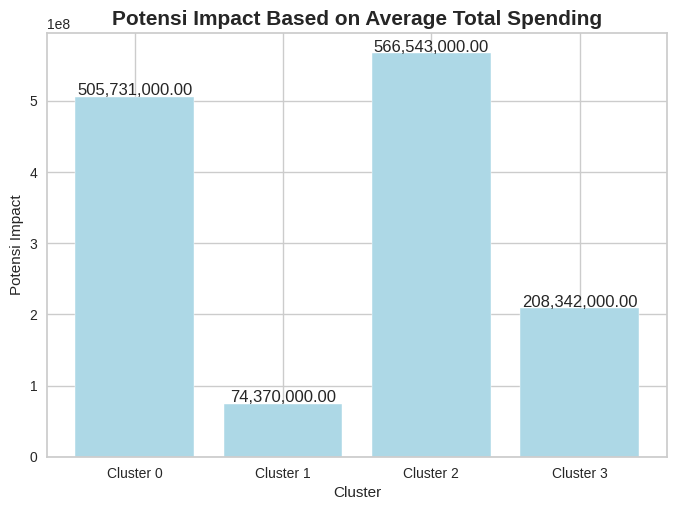

In [ ]:
import matplotlib.pyplot as plt

# Data
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
potensi_impact = [505731000.0, 74370000.0, 566543000.0, 208342000.0]

# Membuat diagram batang dengan warna biru muda
plt.bar(clusters, potensi_impact, color='lightblue')

# Menambahkan label dan judul
plt.xlabel('Cluster')
plt.ylabel('Potensi Impact')
plt.title('Potensi Impact Based on Average Total Spending', fontsize=15, fontweight='bold')

# Menampilkan jumlah potensi impact di tiap cluster
for i, potensi in enumerate(potensi_impact):
    plt.text(i, potensi + 2000000, '{:,.2f}'.format(potensi), ha='center')

# Menampilkan diagram
plt.show()

In [94]:
print('Total Spending of Loyal Customer (Cluster 0): '+str(df_ori[df_ori['Cluster_RFM1']==0].Total_Spending.sum()))
print('Total Spending of Need Attention Customer (Cluster 1): '+str(df_ori[df_ori['Cluster_RFM1']==1].Total_Spending.sum()))
print('Total Spending of At Risk Customer(Cluster 2): '+str(df_ori[df_ori['Cluster_RFM1']==2].Total_Spending.sum()))
print('Total Spending of Potential Loyalist Customer (Cluster 3): '+str(df_ori[df_ori['Cluster_RFM1']==3].Total_Spending.sum()))

Total Spending of Loyal Customer (Cluster 0): 505731000
Total Spending of Need Attention Customer (Cluster 1): 74370000
Total Spending of At Risk Customer(Cluster 2): 566543000
Total Spending of Potential Loyalist Customer (Cluster 3): 208342000


In [95]:
print('Total Spending: '+str(505731000+74370000+566543000+208342000))

Total Spending: 1354986000


##**Potential Impact (Quantitative):**

Jika kita bisa memprioritaskan pada semua kelompok dan mereka tidak beralih (churn), kita masih memiliki potensi GMV sekitar Rp 1,3 miliar/tahun

- Loyal Customer = IDR 505jt/tahun
- Need Attention Customer = IDR 74jt/tahun
- At Risk Customer = IDR 566jt/tahun
- Potential Loyalist Customer= IDR 208jt/tahun